In [83]:
import pandas as pd
import numpy as np
import featuretools as ft 

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [86]:
df_train = pd.read_csv("../data/test/application_test.csv")

In [85]:
df_test = pd.read_csv("../data/test/application_test.csv")

In [87]:
df_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_train.shape

(307511, 122)

In [6]:
df_bureau = pd.read_csv("../data/bureau.csv")
df_bureau_bal = pd.read_csv("../data/bureau_balance.csv")
df_pos = pd.read_csv("../data/POS_CASH_balance.csv")
df_card = pd.read_csv("../data/credit_card_balance.csv")
df_prev = pd.read_csv("../data/previous_application.csv")
df_instal = pd.read_csv("../data/installments_payments.csv")

In [7]:
df_bureau.head()
#df_bureau.shape

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [8]:
df_bureau_bal.tail()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X
27299924,5041336,-51,X


In [9]:
df_bureau_bal["SK_ID_BUREAU"].unique().shape

(817395,)

In [10]:
df_bureau["SK_ID_BUREAU"].unique().shape

(1716428,)

In [11]:
df_bureau.shape

(1716428, 17)

In [12]:
#df_bureau2 = df_bureau.merge(  df_bureau_bal , how = "left" , on ="SK_ID_BUREAU")

In [13]:
df_pos.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [14]:
df_card.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [15]:
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_instal.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [88]:
variable_types_train = {
    
    "NAME_CONTRACT_TYPE": ft.variable_types.Categorical , 
    "CODE_GENDER" : ft.variable_types.Categorical  , 
     "FLAG_OWN_CAR" : ft.variable_types.Categorical , 
    "FLAG_OWN_REALTY" : ft.variable_types.Categorical , 
     "FLAG_OWN_REALTY" : ft.variable_types.Categorical , 
    "CNT_CHILDREN" : ft.variable_types.Numeric , 
    "AMT_INCOME_TOTAL" : ft.variable_types.Numeric , 
     "AMT_INCOME_TOTAL" : ft.variable_types.Numeric , 
    "AMT_CREDIT" : ft.variable_types.Numeric , 
    "AMT_ANNUITY" : ft.variable_types.Numeric , 
    "AMT_GOODS_PRICE" : ft.variable_types.Numeric , 
    "NAME_TYPE_SUITE" : ft.variable_types.Categorical , 
    "NAME_INCOME_TYPE" : ft.variable_types.Categorical , 
    "NAME_EDUCATION_TYPE" : ft.variable_types.Categorical , 
    "NAME_FAMILY_STATUS": ft.variable_types.Categorical  , 
    "NAME_HOUSING_TYPE": ft.variable_types.Categorical , 
    "REGION_POPULATION_RELATIVE" : ft.variable_types.Numeric , 
    "DAYS_BIRTH" : ft.variable_types.Numeric , 
    "DAYS_EMPLOYED" : ft.variable_types.Numeric ,
    "DAYS_REGISTRATION" : ft.variable_types.Numeric ,
    "DAYS_ID_PUBLISH" : ft.variable_types.Numeric , 
    "OWN_CAR_AGE" : ft.variable_types.Numeric , 
    "FLAG_MOBIL" : ft.variable_types.Categorical , 
    "FLAG_EMP_PHONE" :ft.variable_types.Categorical , 
    "FLAG_WORK_PHONE": ft.variable_types.Categorical ,
    "FLAG_CONT_MOBILE" : ft.variable_types.Categorical , 
    "FLAG_PHONE" :  ft.variable_types.Categorical , 
    "FLAG_EMAIL" : ft.variable_types.Categorical , 
    "OCCUPATION_TYPE" : ft.variable_types.Categorical , 
    "CNT_FAM_MEMBERS" : ft.variable_types.Numeric , 
    "REGION_RATING_CLIENT" : ft.variable_types.Ordinal , 
    "REGION_RATING_CLIENT_W_CITY" : ft.variable_types.Ordinal , 
    "WEEKDAY_APPR_PROCESS_START": ft.variable_types.Categorical , 
    "HOUR_APPR_PROCESS_START" : ft.variable_types.Categorical , 
    "REG_REGION_NOT_LIVE_REGION" : ft.variable_types.Categorical , 
    "REG_REGION_NOT_WORK_REGION" : ft.variable_types.Categorical , 
    "LIVE_REGION_NOT_WORK_REGION" : ft.variable_types.Categorical , 
    "REG_CITY_NOT_LIVE_CITY" : ft.variable_types.Categorical , 
    "REG_CITY_NOT_WORK_CITY" : ft.variable_types.Categorical , 
    "LIVE_CITY_NOT_WORK_CITY" : ft.variable_types.Categorical , 
    "ORGANIZATION_TYPE" : ft.variable_types.Categorical , 
    "EXT_SOURCE_1" : ft.variable_types.Numeric , 
    "EXT_SOURCE_2" : ft.variable_types.Numeric , 
    "EXT_SOURCE_3" : ft.variable_types.Numeric , 
    "APARTMENTS_AVG" : ft.variable_types.Numeric , 
    "BASEMENTAREA_AVG" : ft.variable_types.Numeric ,  
    "YEARS_BEGINEXPLUATATION_AVG" : ft.variable_types.Numeric ,  
    "YEARS_BUILD_AVG" : ft.variable_types.Numeric ,  
    "COMMONAREA_AVG" : ft.variable_types.Numeric ,  
    "ELEVATORS_AVG" : ft.variable_types.Numeric ,  
    "ENTRANCES_AVG" : ft.variable_types.Numeric ,  
    "FLOORSMAX_AVG" : ft.variable_types.Numeric ,  
    "FLOORSMIN_AVG" : ft.variable_types.Numeric ,  
    "LANDAREA_AVG" : ft.variable_types.Numeric ,  
    "LIVINGAPARTMENTS_AVG" : ft.variable_types.Numeric ,  
    "LIVINGAREA_AVG" : ft.variable_types.Numeric ,  
    "NONLIVINGAPARTMENTS_AVG" : ft.variable_types.Numeric ,  
    "NONLIVINGAREA_AVG" : ft.variable_types.Numeric ,  
    "APARTMENTS_MODE" : ft.variable_types.Numeric ,  
    "BASEMENTAREA_MODE" : ft.variable_types.Numeric ,  
    "YEARS_BEGINEXPLUATATION_MODE" : ft.variable_types.Numeric ,  
    "YEARS_BUILD_MODE" : ft.variable_types.Numeric ,  
    "COMMONAREA_MODE" : ft.variable_types.Numeric ,  
    "ELEVATORS_MODE" : ft.variable_types.Numeric ,  
    "ENTRANCES_MODE" : ft.variable_types.Numeric ,  
    "FLOORSMAX_MODE" : ft.variable_types.Numeric ,  
    "FLOORSMIN_MODE" : ft.variable_types.Numeric ,  
    "LANDAREA_MODE" : ft.variable_types.Numeric ,  
    "LIVINGAPARTMENTS_MODE" : ft.variable_types.Numeric ,  
    "LIVINGAREA_MODE" : ft.variable_types.Numeric ,
    "NONLIVINGAPARTMENTS_MODE" : ft.variable_types.Numeric ,  
    "NONLIVINGAREA_MODE" : ft.variable_types.Numeric ,  
    "APARTMENTS_MEDI" : ft.variable_types.Numeric ,  
    "BASEMENTAREA_MEDI" : ft.variable_types.Numeric ,
    "YEARS_BEGINEXPLUATATION_MEDI" : ft.variable_types.Numeric ,  
    "YEARS_BUILD_MEDI" : ft.variable_types.Numeric ,  
    "COMMONAREA_MEDI" : ft.variable_types.Numeric ,  
    "ELEVATORS_MEDI" : ft.variable_types.Numeric ,
    "ENTRANCES_MEDI" : ft.variable_types.Numeric ,  
    "FLOORSMAX_MEDI" : ft.variable_types.Numeric ,
    "FLOORSMIN_MEDI" : ft.variable_types.Numeric ,  
    "LANDAREA_MEDI" : ft.variable_types.Numeric ,
    "LIVINGAPARTMENTS_MEDI" : ft.variable_types.Numeric ,  
    "LIVINGAREA_MEDI" : ft.variable_types.Numeric ,
    "NONLIVINGAPARTMENTS_MEDI" : ft.variable_types.Numeric ,
    "NONLIVINGAREA_MEDI" : ft.variable_types.Numeric ,  
    "FONDKAPREMONT_MODE" : ft.variable_types.Categorical ,
    "HOUSETYPE_MODE" : ft.variable_types.Categorical ,  
    "TOTALAREA_MODE" : ft.variable_types.Numeric ,
    "WALLSMATERIAL_MODE" : ft.variable_types.Categorical ,
    "EMERGENCYSTATE_MODE" : ft.variable_types.Categorical ,  
    "OBS_30_CNT_SOCIAL_CIRCLE" : ft.variable_types.Numeric ,
    "DEF_30_CNT_SOCIAL_CIRCLE" : ft.variable_types.Numeric ,
    "OBS_60_CNT_SOCIAL_CIRCLE" : ft.variable_types.Numeric ,  
    "DEF_60_CNT_SOCIAL_CIRCLE" : ft.variable_types.Numeric ,
    "DAYS_LAST_PHONE_CHANGE" : ft.variable_types.Numeric ,
    "FLAG_DOCUMENT_2" : ft.variable_types.Categorical ,  
    "FLAG_DOCUMENT_3" : ft.variable_types.Categorical ,  
    "FLAG_DOCUMENT_4" : ft.variable_types.Categorical , 
    "FLAG_DOCUMENT_5" : ft.variable_types.Categorical , 
    "FLAG_DOCUMENT_6" : ft.variable_types.Categorical , 
    "FLAG_DOCUMENT_7" : ft.variable_types.Categorical , 
    "FLAG_DOCUMENT_8" : ft.variable_types.Categorical , 
    "FLAG_DOCUMENT_9" : ft.variable_types.Categorical , 
    "FLAG_DOCUMENT_10" : ft.variable_types.Categorical ,
    "FLAG_DOCUMENT_11" : ft.variable_types.Categorical ,  
    "FLAG_DOCUMENT_12" : ft.variable_types.Categorical ,  
    "FLAG_DOCUMENT_13" : ft.variable_types.Categorical , 
    "FLAG_DOCUMENT_14" : ft.variable_types.Categorical , 
    "FLAG_DOCUMENT_15" : ft.variable_types.Categorical , 
    "FLAG_DOCUMENT_16" : ft.variable_types.Categorical , 
    "FLAG_DOCUMENT_17" : ft.variable_types.Categorical , 
    "FLAG_DOCUMENT_18" : ft.variable_types.Categorical , 
    "FLAG_DOCUMENT_19" : ft.variable_types.Categorical , 
    "FLAG_DOCUMENT_20" : ft.variable_types.Categorical , 
    "FLAG_DOCUMENT_21" : ft.variable_types.Categorical , 
    "AMT_REQ_CREDIT_BUREAU_HOUR" : ft.variable_types.Numeric , 
    
    "AMT_REQ_CREDIT_BUREAU_DAY" : ft.variable_types.Numeric , 
    "AMT_REQ_CREDIT_BUREAU_WEEK" : ft.variable_types.Numeric , 
    "AMT_REQ_CREDIT_BUREAU_MON" : ft.variable_types.Numeric , 
    "AMT_REQ_CREDIT_BUREAU_QRT" : ft.variable_types.Numeric , 
    "AMT_REQ_CREDIT_BUREAU_YEAR" : ft.variable_types.Numeric , 
}
variable_types_bureau  = {
    
     "CREDIT_ACTIVE" : ft.variable_types.Categorical , 
    "CREDIT_CURRENCY" : ft.variable_types.Categorical , 
    "DAYS_CREDIT" : ft.variable_types.Numeric , 
    "CREDIT_DAY_OVERDUE" : ft.variable_types.Numeric , 
    "DAYS_CREDIT_ENDDATE": ft.variable_types.Numeric ,
    "DAYS_ENDDATE_FACT": ft.variable_types.Numeric ,
    "AMT_CREDIT_MAX_OVERDUE": ft.variable_types.Numeric ,
    "CNT_CREDIT_PROLONG": ft.variable_types.Numeric ,
    "CNT_CREDIT_PROLONG": ft.variable_types.Numeric ,
    "AMT_CREDIT_SUM": ft.variable_types.Numeric ,
    "AMT_CREDIT_SUM_DEBT": ft.variable_types.Numeric ,
    "AMT_CREDIT_SUM_LIMIT": ft.variable_types.Numeric ,
    "AMT_CREDIT_SUM_OVERDUE": ft.variable_types.Numeric ,
    "CREDIT_TYPE": ft.variable_types.Categorical ,
    "DAYS_CREDIT_UPDATE": ft.variable_types.Numeric ,
    "AMT_ANNUITY": ft.variable_types.Numeric ,
}
variable_types_bureaubal = {
    "MONTHS_BALANCE" : ft.variable_types.Numeric , 
    "STATUS": ft.variable_types.Categorical
    
}
variable_types_pos = {
    "MONTHS_BALANCE" : ft.variable_types.Numeric , 
    "CNT_INSTALMENT" : ft.variable_types.Numeric , 
    "CNT_INSTALMENT_FUTURE" :  ft.variable_types.Numeric , 
    "NAME_CONTRACT_STATUS" : ft.variable_types.Categorical , 
    "SK_DPD" : ft.variable_types.Numeric , 
    "SK_DPD_DEF" : ft.variable_types.Numeric 

}
variable_types_card = {
    
    "MONTHS_BALANCE" : ft.variable_types.Numeric , 
    "AMT_BALANCE" : ft.variable_types.Numeric , 
    "AMT_CREDIT_LIMIT_ACTUAL" : ft.variable_types.Numeric , 
    "AMT_DRAWINGS_ATM_CURRENT" : ft.variable_types.Numeric , 
    "AMT_DRAWINGS_CURRENT" : ft.variable_types.Numeric , 
    "AMT_DRAWINGS_OTHER_CURRENT" : ft.variable_types.Numeric ,  
     "AMT_DRAWINGS_POS_CURRENT" : ft.variable_types.Numeric ,  
     "AMT_INST_MIN_REGULARITY" : ft.variable_types.Numeric ,  
     "AMT_PAYMENT_CURRENT" : ft.variable_types.Numeric ,  
     "AMT_PAYMENT_TOTAL_CURRENT" : ft.variable_types.Numeric ,  
     "AMT_RECEIVABLE_PRINCIPAL" : ft.variable_types.Numeric ,  
    "AMT_RECIVABLE" : ft.variable_types.Numeric ,  
    "AMT_TOTAL_RECEIVABLE" : ft.variable_types.Numeric ,  
    "CNT_DRAWINGS_ATM_CURRENT" : ft.variable_types.Numeric ,  
    "CNT_DRAWINGS_CURRENT" : ft.variable_types.Numeric ,  
    "CNT_DRAWINGS_OTHER_CURRENT" : ft.variable_types.Numeric ,  
      "CNT_DRAWINGS_POS_CURRENT" : ft.variable_types.Numeric , 
    "CNT_INSTALMENT_MATURE_CUM" :  ft.variable_types.Numeric , 
    "SK_DPD" : ft.variable_types.Numeric , 
    "SK_DPD_DEF" : ft.variable_types.Numeric , 
     
}
variable_types_prev = {
    "SK_ID_PREV" : ft.variable_types.Index , 
    "NAME_CONTRACT_TYPE" : ft.variable_types.Categorical , 
    "AMT_ANNUITY" : ft.variable_types.Numeric , 
    "AMT_APPLICATION" : ft.variable_types.Numeric , 
    "AMT_CREDIT" : ft.variable_types.Numeric , 
     "AMT_DOWN_PAYMENT" : ft.variable_types.Numeric , 
     "AMT_GOODS_PRICE" : ft.variable_types.Numeric , 
     "WEEKDAY_APPR_PROCESS_START" : ft.variable_types.Categorical , 
     "HOUR_APPR_PROCESS_START" : ft.variable_types.Categorical , 
     "FLAG_LAST_APPL_PER_CONTRACT" : ft.variable_types.Categorical , 
     "NFLAG_LAST_APPL_IN_DAY" : ft.variable_types.Categorical , 
     "RATE_DOWN_PAYMENT" : ft.variable_types.Numeric , 
     "RATE_INTEREST_PRIMARY" : ft.variable_types.Numeric , 
    "RATE_INTEREST_PRIVILEGED" : ft.variable_types.Numeric , 
     "NAME_CASH_LOAN_PURPOSE" : ft.variable_types.Categorical , 
    "NAME_CONTRACT_STATUS" : ft.variable_types.Categorical , 
     "DAYS_DECISION" : ft.variable_types.Numeric , 
     "NAME_PAYMENT_TYPE" : ft.variable_types.Categorical , 
    "CODE_REJECT_REASON" : ft.variable_types.Categorical , 
     "NAME_TYPE_SUITE" : ft.variable_types.Categorical , 
     "NAME_CLIENT_TYPE" : ft.variable_types.Categorical , 
    "NAME_GOODS_CATEGORY" : ft.variable_types.Categorical , 
     "NAME_PORTFOLIO" : ft.variable_types.Categorical , 
     "NAME_PRODUCT_TYPE" : ft.variable_types.Categorical , 
    "CHANNEL_TYPE" : ft.variable_types.Categorical , 
     "SELLERPLACE_AREA" : ft.variable_types.Categorical, 
     "NAME_SELLER_INDUSTRY" : ft.variable_types.Categorical , 
    "CNT_PAYMENT" : ft.variable_types.Numeric , 
     "NAME_YIELD_GROUP" : ft.variable_types.Categorical , 
     "PRODUCT_COMBINATION" : ft.variable_types.Categorical , 
     "DAYS_FIRST_DRAWING" : ft.variable_types.Numeric , 
     "DAYS_FIRST_DUE" : ft.variable_types.Numeric , 
     "DAYS_LAST_DUE_1ST_VERSION" : ft.variable_types.Numeric , 
     "DAYS_LAST_DUE" : ft.variable_types.Numeric , 
     "DAYS_TERMINATION" : ft.variable_types.Numeric , 
     "NFLAG_INSURED_ON_APPROVAL" : ft.variable_types.Categorical , 

}
variable_types_instal = {
    
    "NUM_INSTALMENT_VERSION" :  ft.variable_types.Numeric ,
    "DAYS_INSTALMENT" :  ft.variable_types.Numeric ,
    "DAYS_ENTRY_PAYMENT" :  ft.variable_types.Numeric ,
    "AMT_INSTALMENT" :  ft.variable_types.Numeric ,
    "AMT_PAYMENT" :  ft.variable_types.Numeric ,
}

In [89]:
entity_train = ft.EntitySet( id = "train" )

In [90]:
entity_train = entity_train.entity_from_dataframe(entity_id = 'train', dataframe = df_train, 
index = 'SK_ID_CURR' , variable_types =  variable_types_train )

In [91]:
entity_train = entity_train.entity_from_dataframe( entity_id = "bureau" , dataframe = df_bureau 
 , index = "SK_ID_BUREAU" , variable_types = variable_types_bureau  )

In [92]:
entity_train = entity_train.entity_from_dataframe(
 entity_id ="bureau_bal" , dataframe = df_bureau_bal , make_index = True , index = "bureau_bal_id" , variable_types = variable_types_bureaubal
)

In [93]:
entity_train = entity_train.entity_from_dataframe(
entity_id = "card" , dataframe = df_card , make_index = True , index ="card_id" , variable_types = variable_types_card
)

In [94]:
entity_train = entity_train.entity_from_dataframe(
entity_id = "prev" , dataframe = df_prev , variable_types = variable_types_prev , index = "SK_ID_PREV"
)

In [95]:
entity_train = entity_train.entity_from_dataframe(
entity_id = "instal" , dataframe = df_instal , variable_types = variable_types_instal , index = "install_id" , make_index = True
)

In [96]:
entity_train = entity_train.entity_from_dataframe(
entity_id = "pos" , dataframe = df_pos , variable_types = variable_types_pos , index = "pos_id" , make_index = True
)

In [106]:
r_train_prev = ft.Relationship( entity_train["train"]["SK_ID_CURR"] , entity_train["prev"]["SK_ID_CURR"]   )
r_train_bureau = ft.Relationship( entity_train["train"]["SK_ID_CURR"] ,entity_train["bureau"]["SK_ID_CURR"] )
r_train_card = ft.Relationship( entity_train["train"]["SK_ID_CURR"] , entity_train["card"]["SK_ID_CURR"]  )
r_train_pos = ft.Relationship( entity_train["train"]["SK_ID_CURR"] , entity_train["pos"]["SK_ID_CURR"]  )

#r_bureau_bureaubal = ft.Relationship( entity_train["bureau"]["SK_ID_BUREAU"] , entity_train["bureau_bal"]["SK_ID_BUREAU"]  )

r_prev_pos = ft.Relationship( entity_train["prev"]["SK_ID_PREV"] , entity_train["pos"]["SK_ID_PREV"] )
r_prev_instal = ft.Relationship( entity_train["prev"][ "SK_ID_PREV"] , entity_train["instal"]["SK_ID_PREV"] )
r_prev_card = ft.Relationship( entity_train["prev"][ "SK_ID_PREV"] , entity_train["card"]["SK_ID_PREV"] )

In [107]:
entity_train = entity_train.add_relationship( r_train_prev) 
entity_train = entity_train.add_relationship( r_train_bureau ) 
entity_train = entity_train.add_relationship( r_train_card ) 
entity_train = entity_train.add_relationship( r_train_pos ) 


entity_train = entity_train.add_relationship(  r_bureau_bureaubal ) 
entity_train = entity_train.add_relationship(  r_prev_pos ) 
entity_train = entity_train.add_relationship(  r_prev_instal )
entity_train = entity_train.add_relationship(  r_prev_card ) 



2018-07-03 15:32:25,244 featuretools.entityset - WARNING    Not adding duplicate relationship: <Relationship: prev.SK_ID_CURR -> train.SK_ID_CURR>
2018-07-03 15:32:25,246 featuretools.entityset - WARNING    Not adding duplicate relationship: <Relationship: bureau.SK_ID_CURR -> train.SK_ID_CURR>
2018-07-03 15:32:25,247 featuretools.entityset - WARNING    Not adding duplicate relationship: <Relationship: card.SK_ID_CURR -> train.SK_ID_CURR>
2018-07-03 15:32:25,249 featuretools.entityset - WARNING    Not adding duplicate relationship: <Relationship: pos.SK_ID_CURR -> train.SK_ID_CURR>


In [108]:
features, feature_names = ft.dfs(entityset = entity_train, target_entity = 'train', 
                                 agg_primitives = ['mean', 'max', 'percent_true', 'last'], max_depth = 5 )

RuntimeError: Diamond graph detected!

In [111]:
features.head()

,LIVINGAPARTMENTS_MODE,REGION_RATING_CLIENT,EXT_SOURCE_1,APARTMENTS_MODE,NAME_INCOME_TYPE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_7,FLAG_DOCUMENT_11,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,...,LAST(pos.SK_ID_PREV),MAX(card.AMT_RECIVABLE),LAST(prev.AMT_CREDIT),LAST(card.AMT_PAYMENT_CURRENT),MEAN(prev.DAYS_LAST_DUE_1ST_VERSION),MAX(card.CNT_DRAWINGS_OTHER_CURRENT),MEAN(bureau.AMT_CREDIT_SUM_DEBT),LAST(card.AMT_PAYMENT_TOTAL_CURRENT),LAST(prev.NAME_CONTRACT_TYPE),MAX(prev.RATE_INTEREST_PRIVILEGED)
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,NaN,2,0.752614,0.0672,Working,0,0,0,0,0,...,1369693.0,NaN,23787.0,NaN,-1499.000000,NaN,85240.928571,NaN,Consumer loans,NaN
100005,NaN,2,0.564990,NaN,Working,0,0,0,0,0,...,2495675.0,NaN,40153.5,NaN,-376.000000,NaN,189469.500000,NaN,Consumer loans,NaN
100013,NaN,2,NaN,NaN,Working,0,0,0,0,0,...,1865796.0,161420.220,47934.0,274.32,-515.666667,0.0,0.000000,0.0,Consumer loans,NaN
100028,0.2626,2,0.525734,0.3109,Working,0,0,0,0,0,...,2829726.0,36980.415,130765.5,13275.00,121221.333333,0.0,18630.450000,13275.0,Consumer loans,NaN
100038,NaN,2,0.202145,NaN,Working,0,0,0,1,1,...,2327930.0,NaN,92605.5,NaN,-457.000000,NaN,NaN,NaN,Consumer loans,NaN


In [110]:
Y.to_csv("../data/labels_train.csv")

In [102]:
#Y = features["TARGET"]

In [103]:
#features2 = features.drop( ["TARGET"] , axis = 1 )
features2 = features.copy()

In [104]:
features2 = features2.fillna( 0.0 )

In [105]:
features2.to_csv("../data/features_test.csv" )

In [51]:
features2["LAST(prev.NAME_CONTRACT_TYPE)"].value_counts()

Consumer loans     168120
Cash loans          94068
Revolving loans     28821
0.0                 16454
XNA                    48
Name: LAST(prev.NAME_CONTRACT_TYPE), dtype: int64

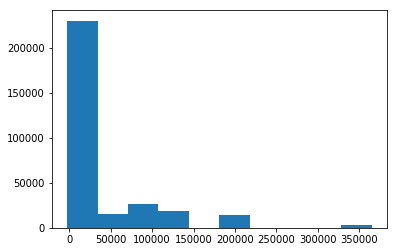

In [58]:
plt.hist( features2["MEAN(prev.DAYS_LAST_DUE_1ST_VERSION)"].values  )
plt.show()

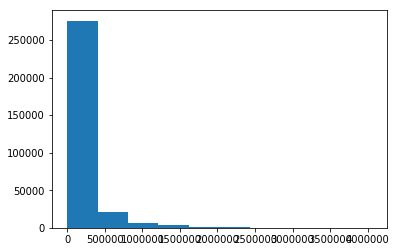

In [60]:
plt.hist( features2["LAST(prev.AMT_CREDIT)"].values  )
plt.show()

In [114]:
features = features.fillna( 0.0 )
features_numeric = features2.select_dtypes(include=[np.number])

,LIVINGAPARTMENTS_MODE,REGION_RATING_CLIENT,EXT_SOURCE_1,APARTMENTS_MODE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_7,FLAG_DOCUMENT_11,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,...,MEAN(prev.CNT_PAYMENT),LAST(pos.SK_ID_PREV),MAX(card.AMT_RECIVABLE),LAST(prev.AMT_CREDIT),LAST(card.AMT_PAYMENT_CURRENT),MEAN(prev.DAYS_LAST_DUE_1ST_VERSION),MAX(card.CNT_DRAWINGS_OTHER_CURRENT),MEAN(bureau.AMT_CREDIT_SUM_DEBT),LAST(card.AMT_PAYMENT_TOTAL_CURRENT),MAX(prev.RATE_INTEREST_PRIVILEGED)
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,0.0000,2,0.752614,0.0672,0,0,0,0,0,-812,...,8.000000,1369693.0,0.000,23787.0,0.00,-1499.000000,0.0,85240.928571,0.0,0.0
100005,0.0000,2,0.564990,0.0000,0,0,0,0,0,-1623,...,12.000000,2495675.0,0.000,40153.5,0.00,-376.000000,0.0,189469.500000,0.0,0.0
100013,0.0000,2,0.000000,0.0000,0,0,0,0,0,-3503,...,17.333333,1865796.0,161420.220,47934.0,274.32,-515.666667,0.0,0.000000,0.0,0.0
100028,0.2626,2,0.525734,0.3109,0,0,0,0,0,-4208,...,11.333333,2829726.0,36980.415,130765.5,13275.00,121221.333333,0.0,18630.450000,13275.0,0.0
100038,0.0000,2,0.202145,0.0000,0,0,0,1,1,-4262,...,24.000000,2327930.0,0.000,92605.5,0.00,-457.000000,0.0,0.000000,0.0,0.0


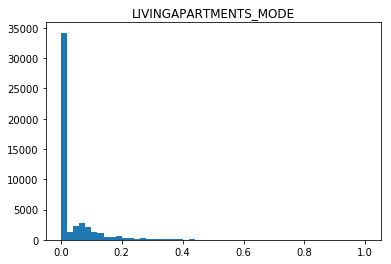

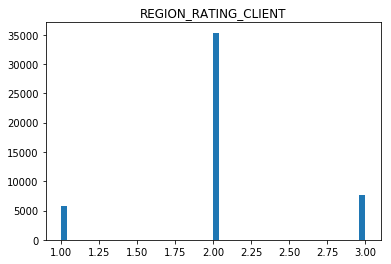

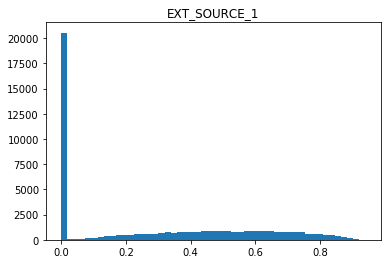

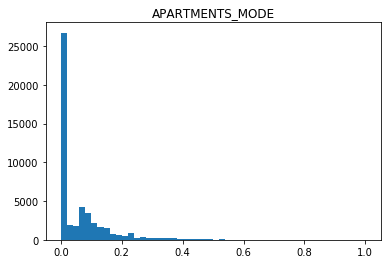

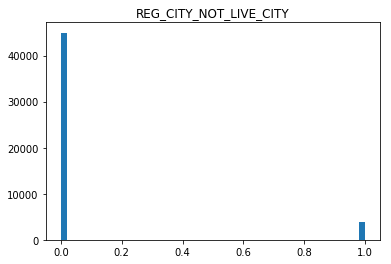

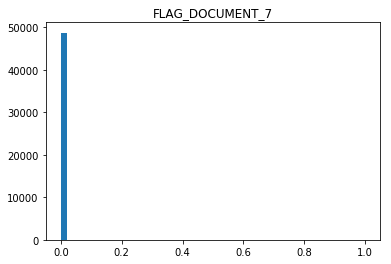

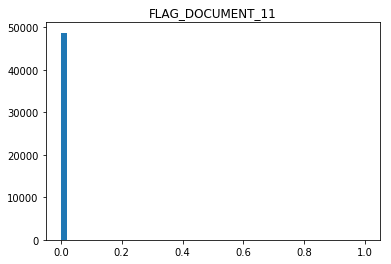

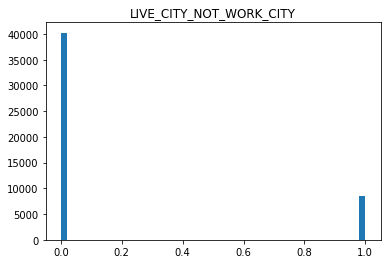

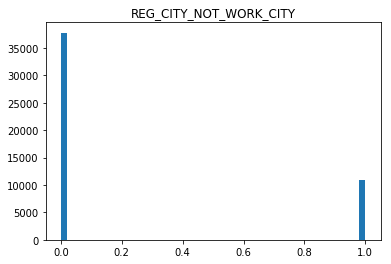

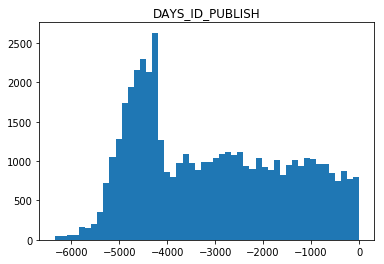

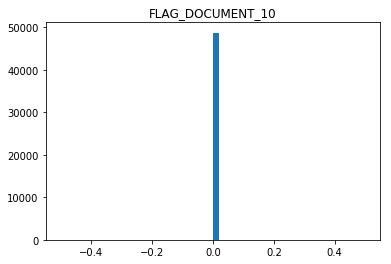

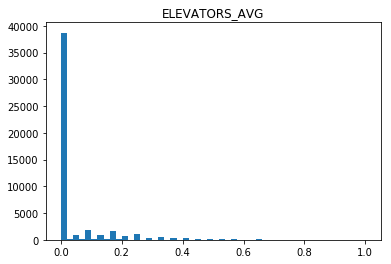

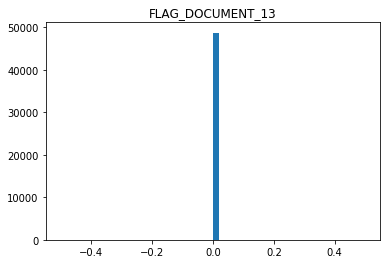

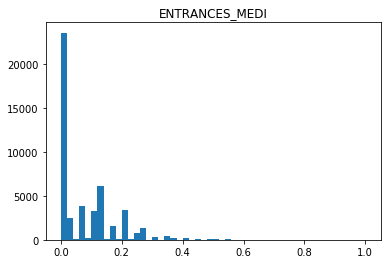

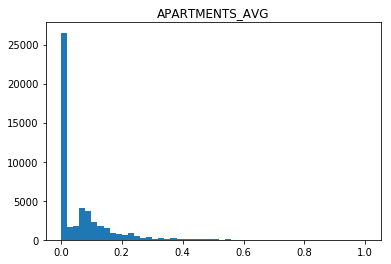

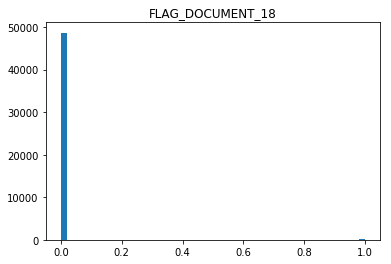

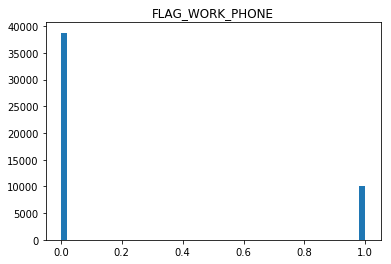

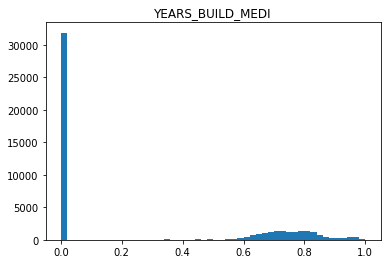

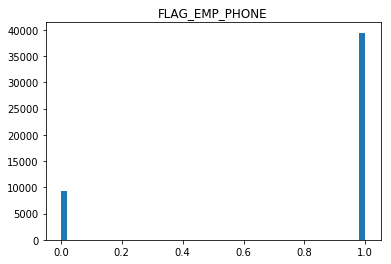

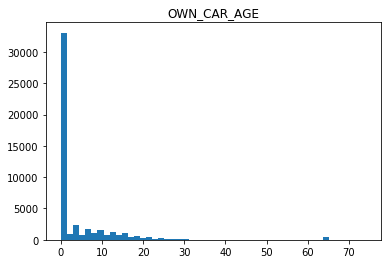

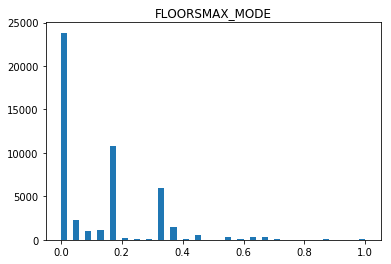

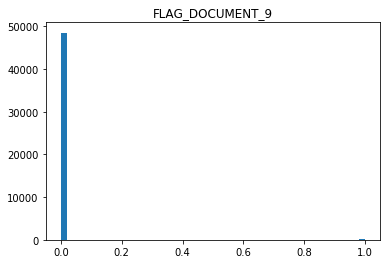

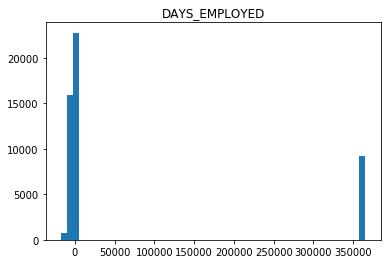

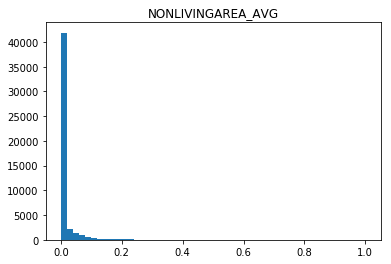

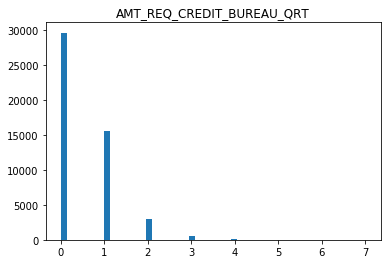

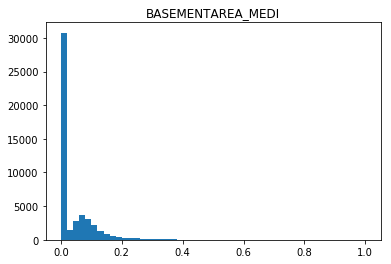

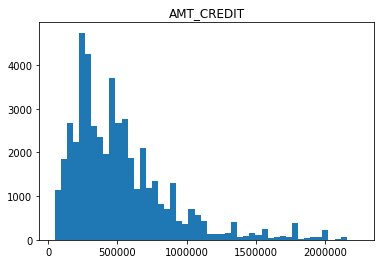

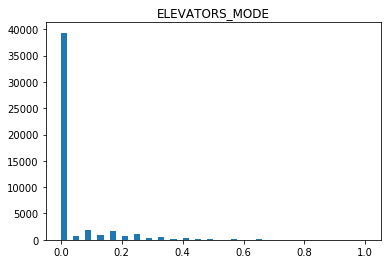

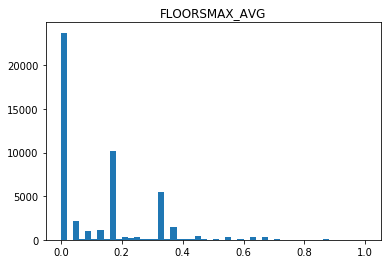

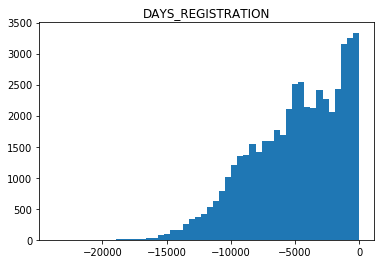

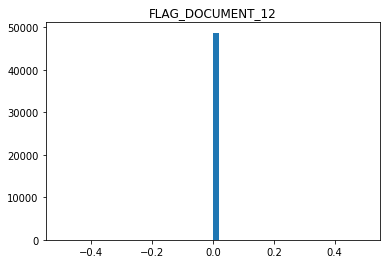

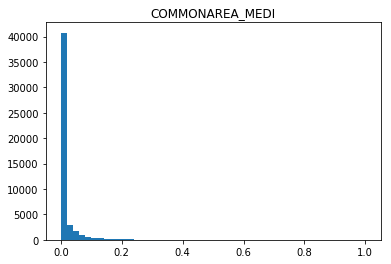

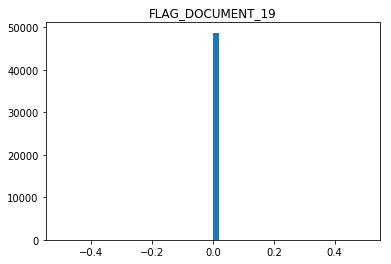

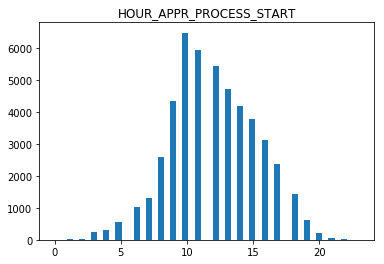

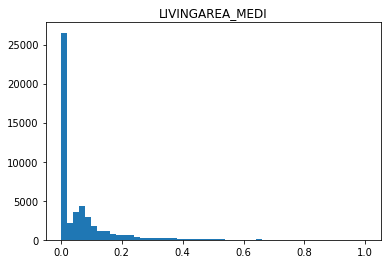

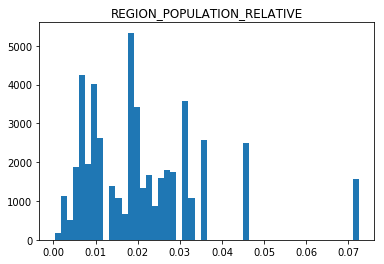

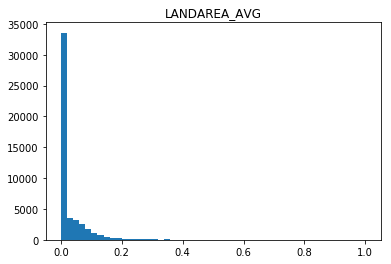

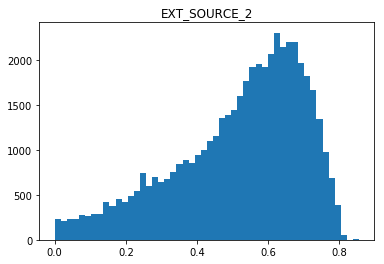

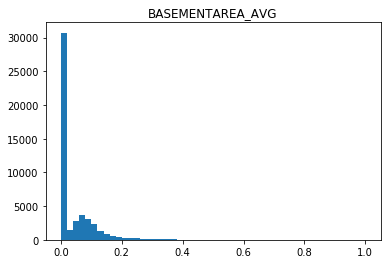

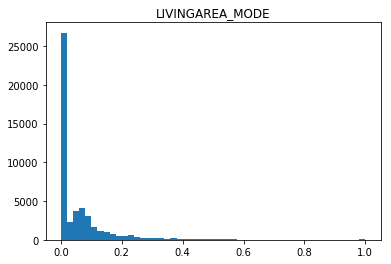

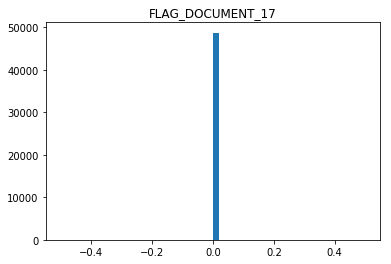

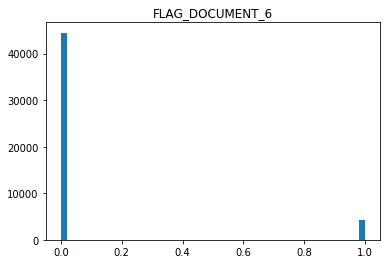

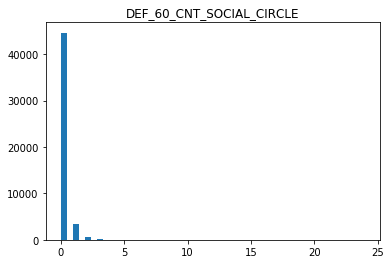

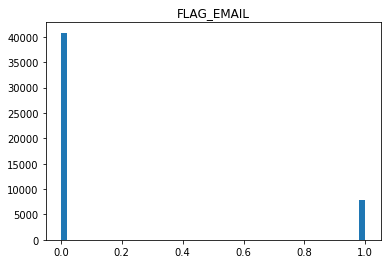

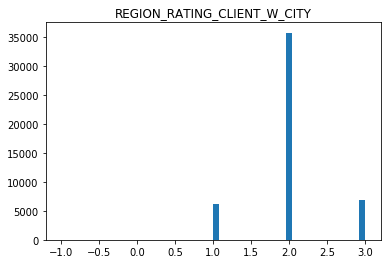

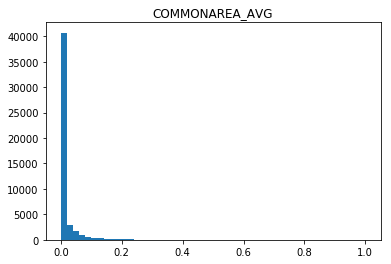

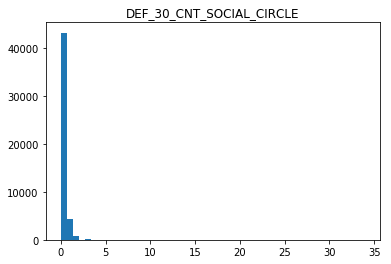

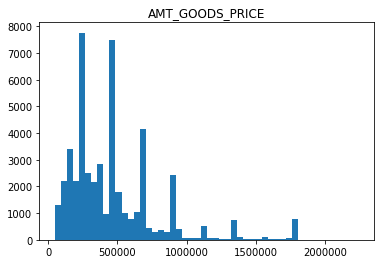

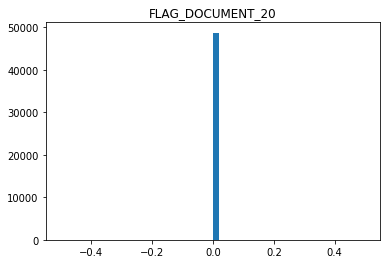

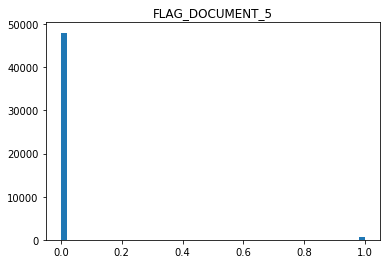

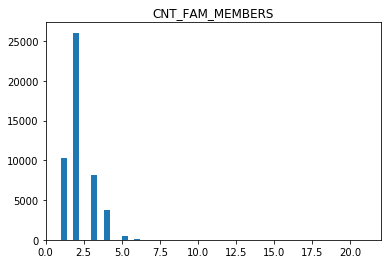

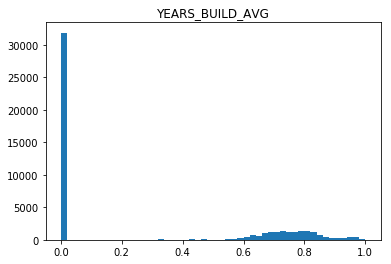

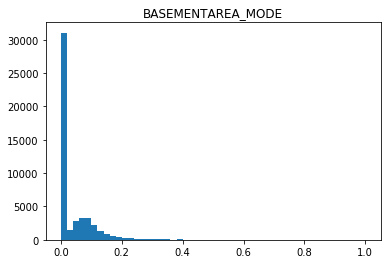

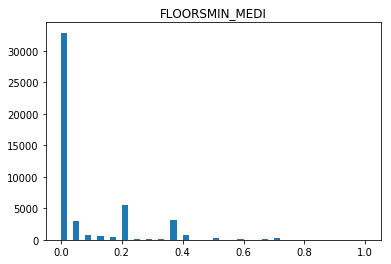

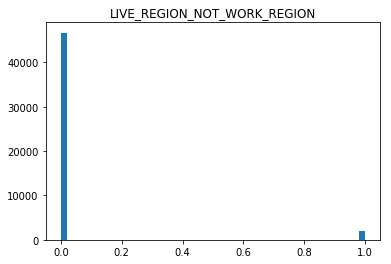

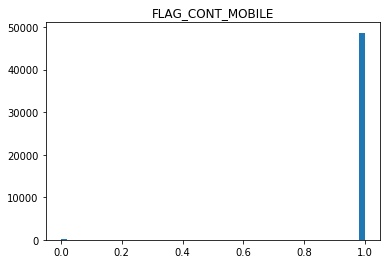

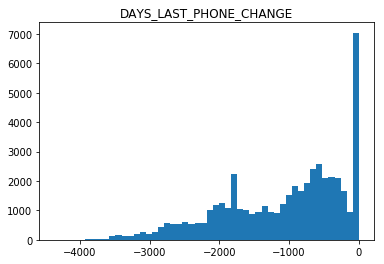

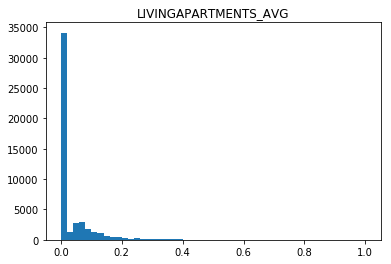

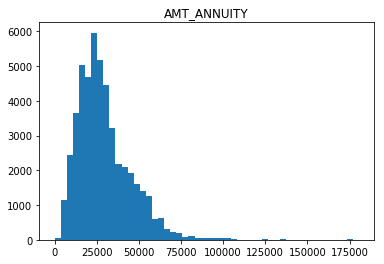

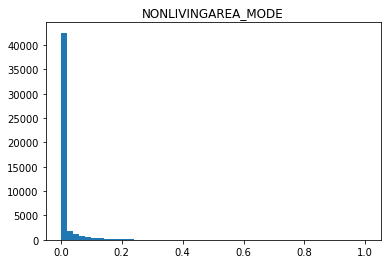

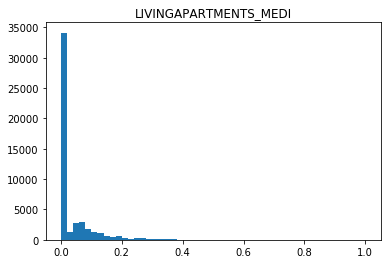

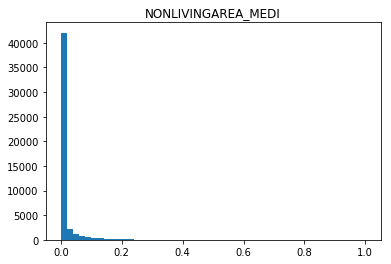

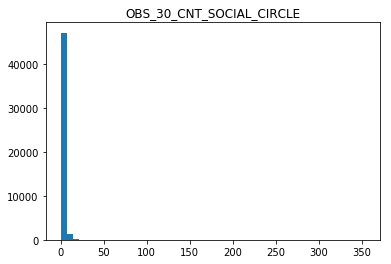

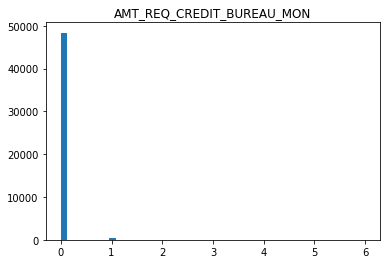

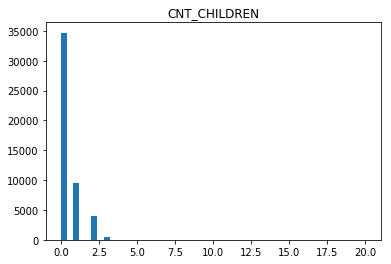

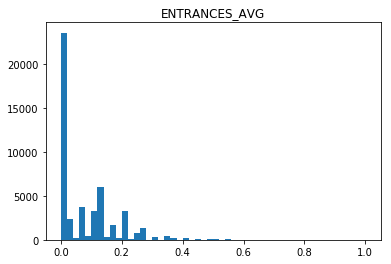

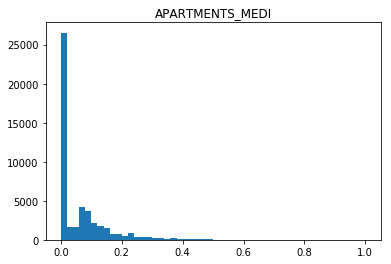

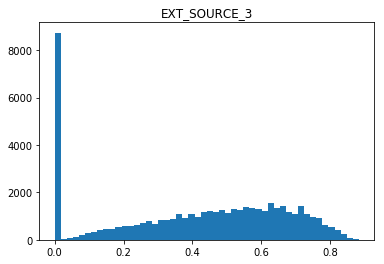

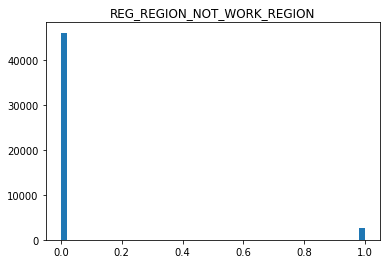

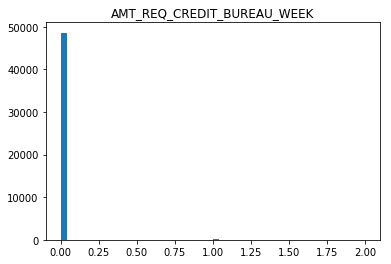

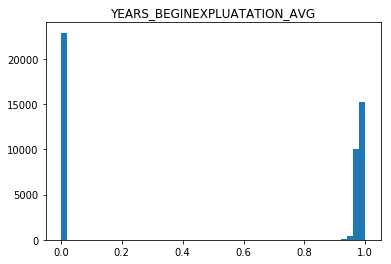

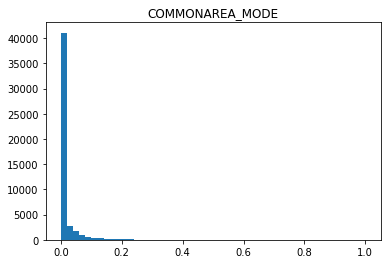

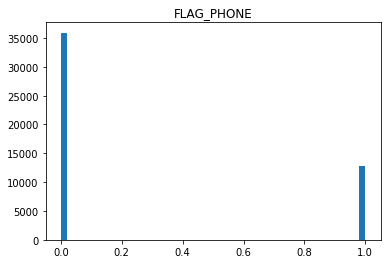

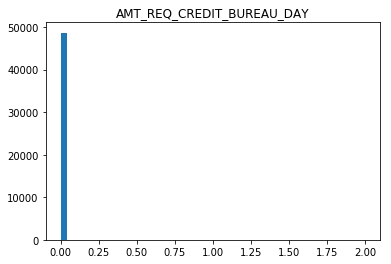

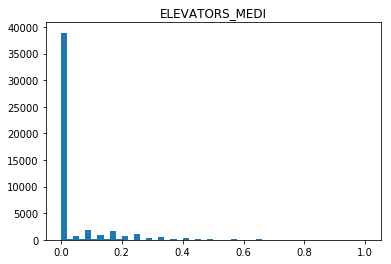

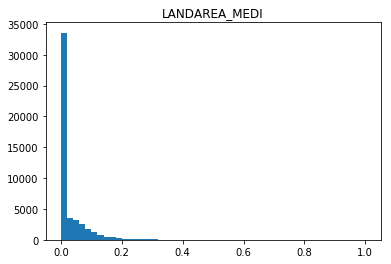

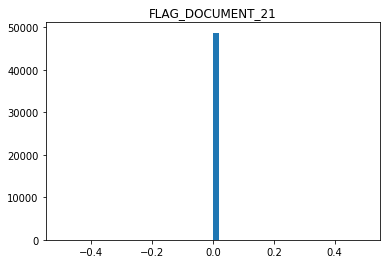

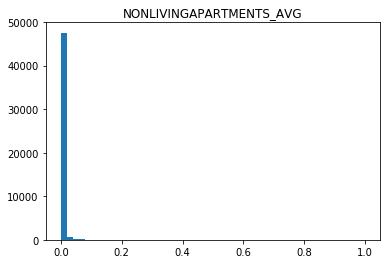

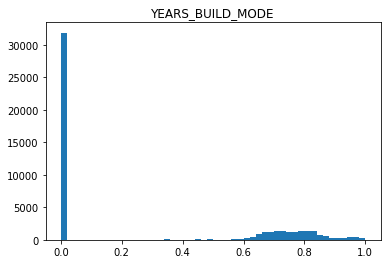

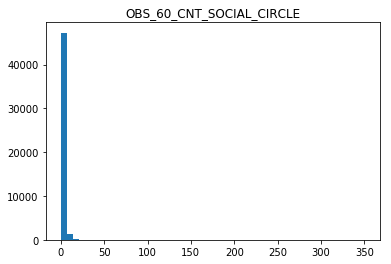

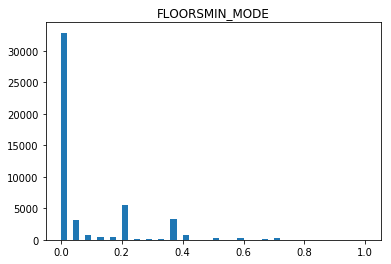

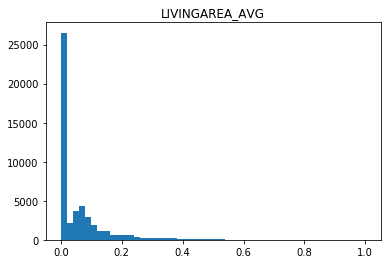

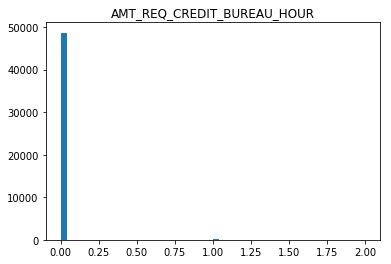

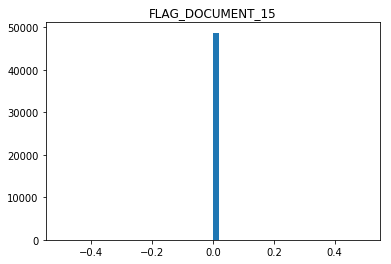

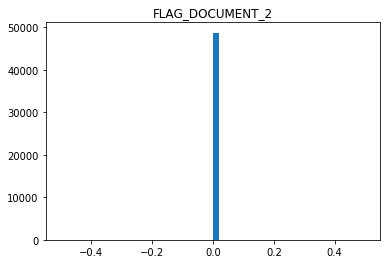

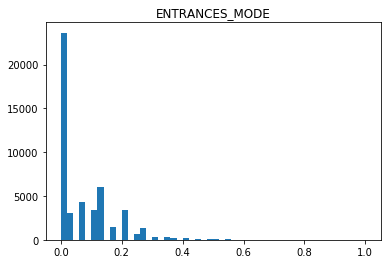

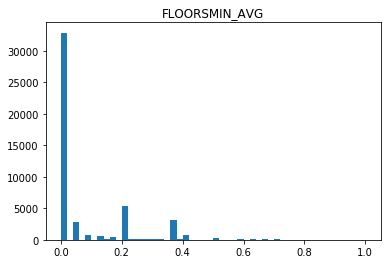

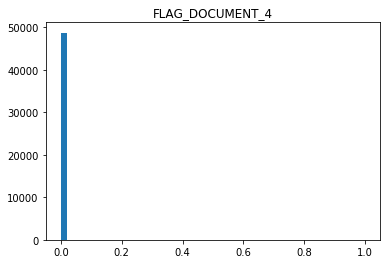

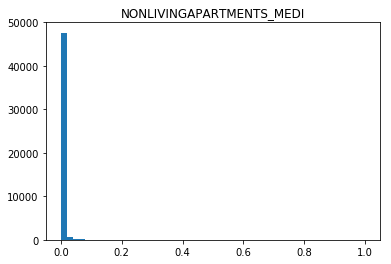

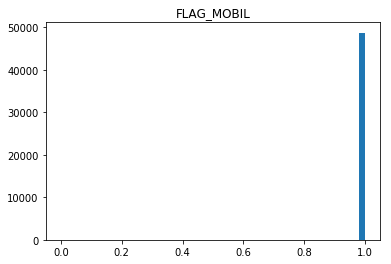

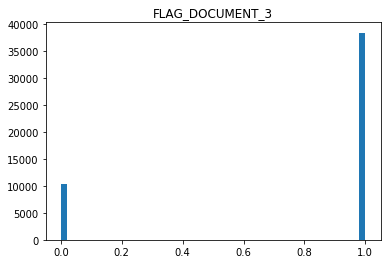

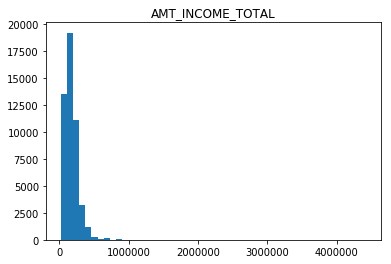

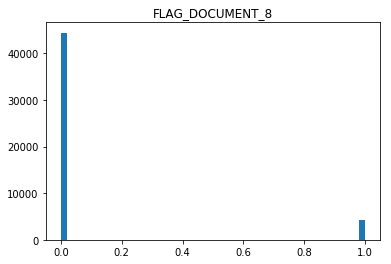

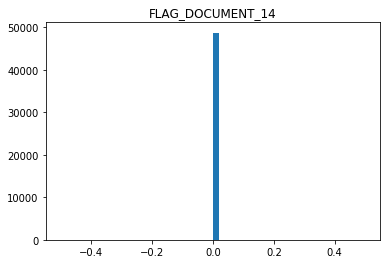

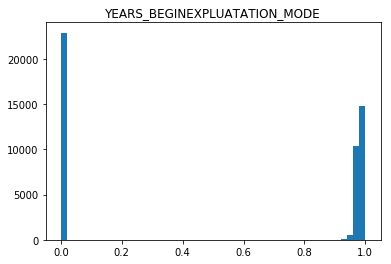

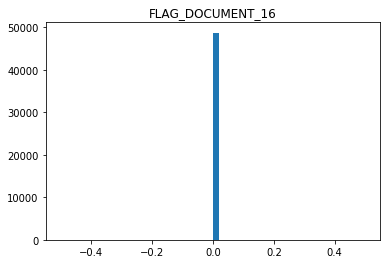

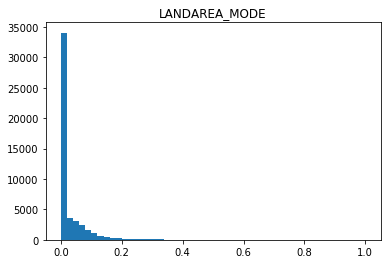

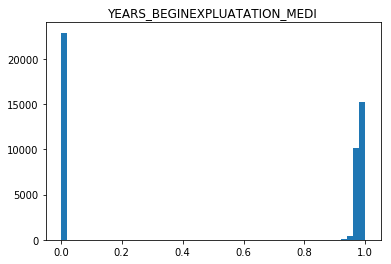

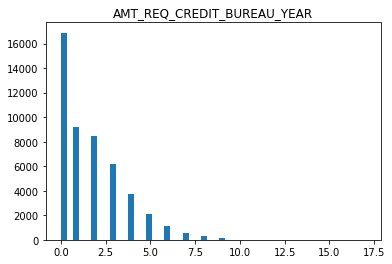

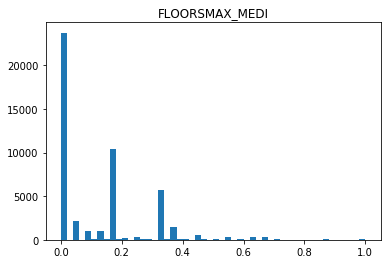

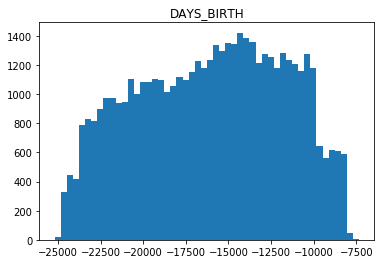

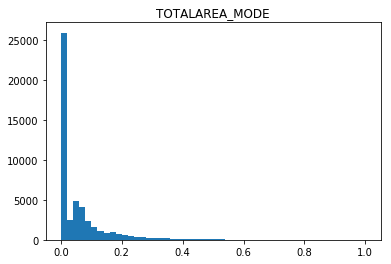

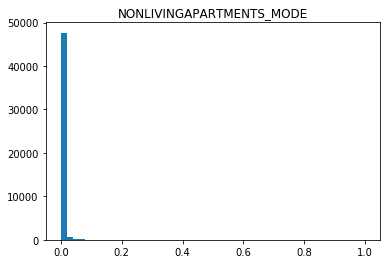

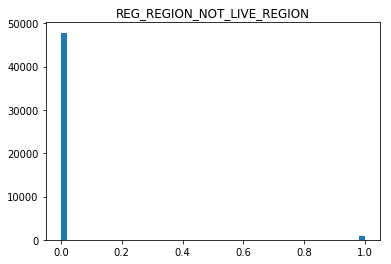

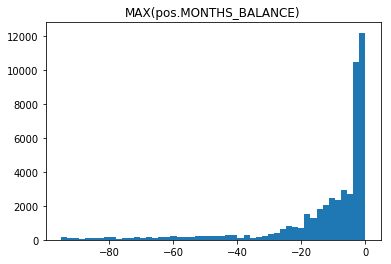

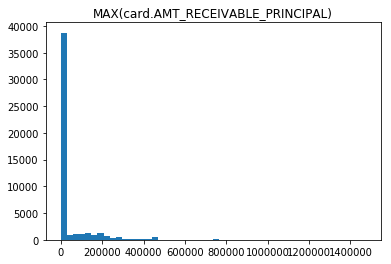

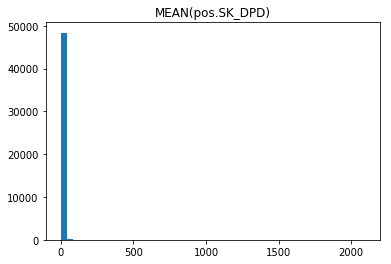

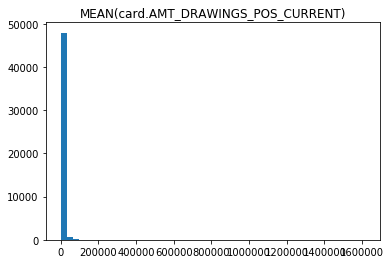

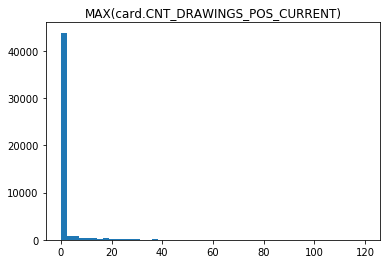

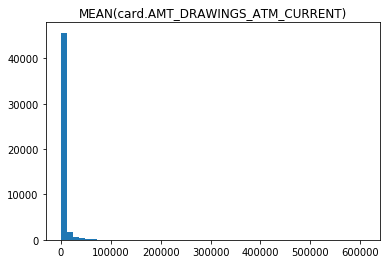

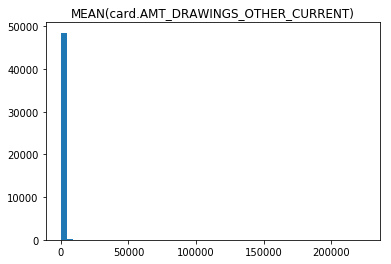

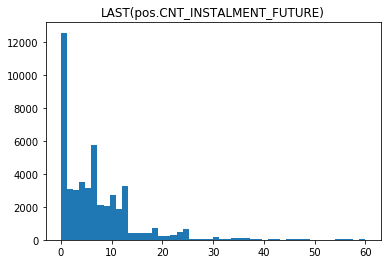

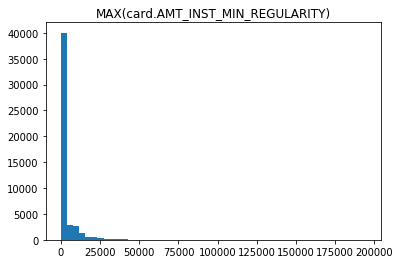

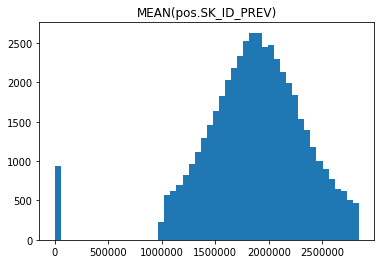

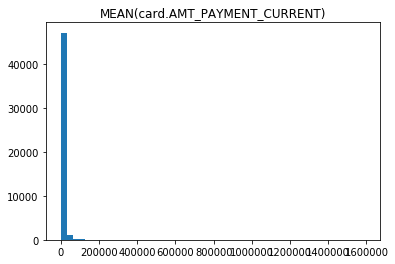

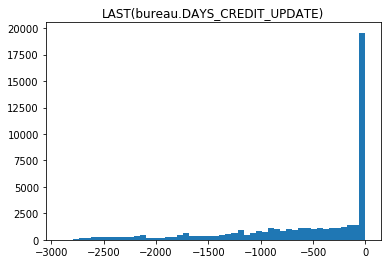

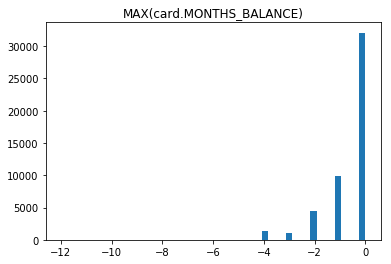

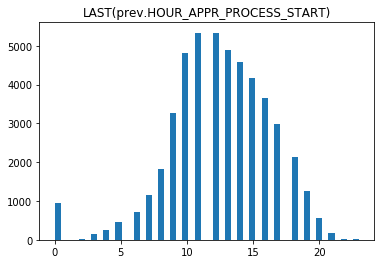

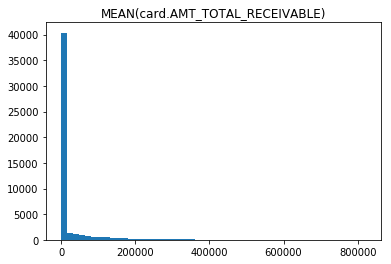

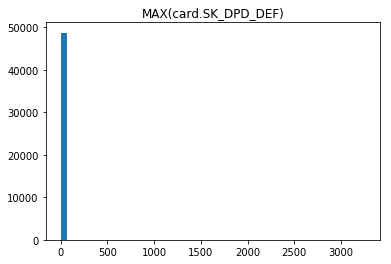

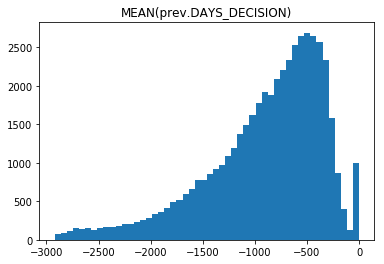

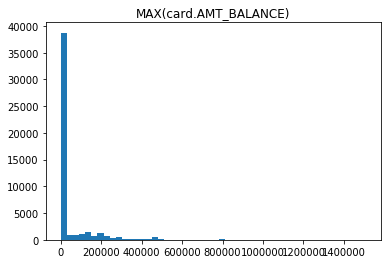

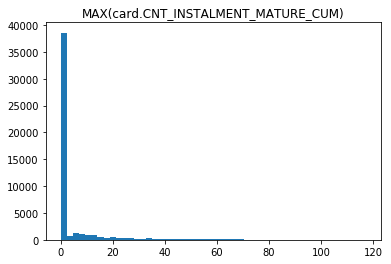

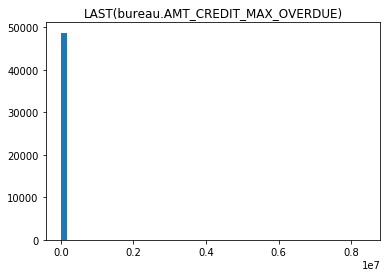

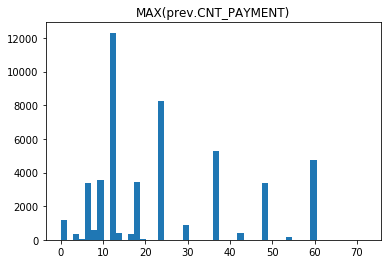

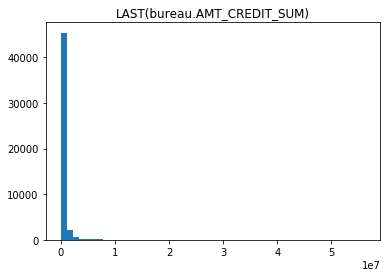

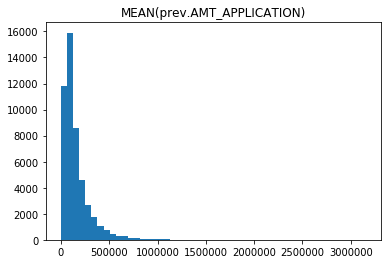

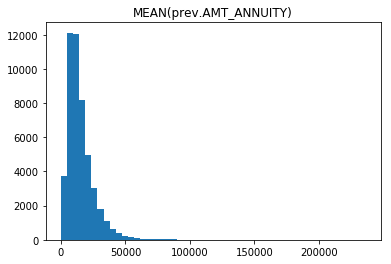

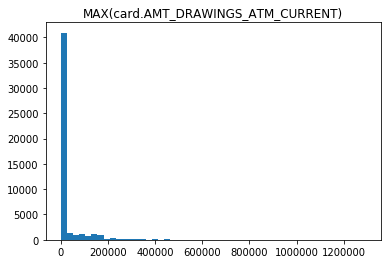

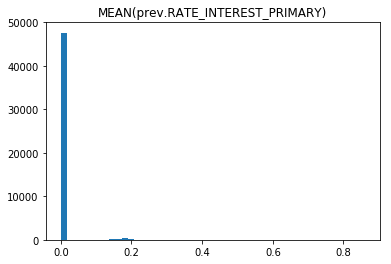

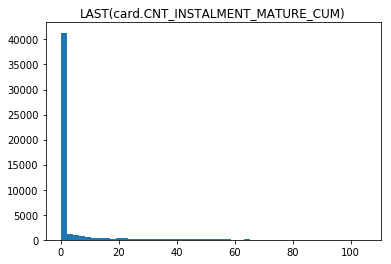

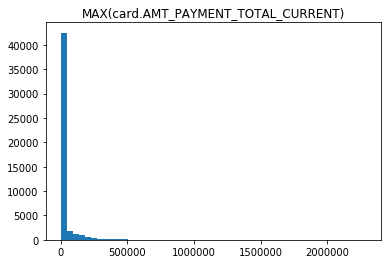

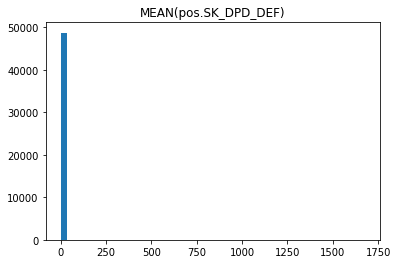

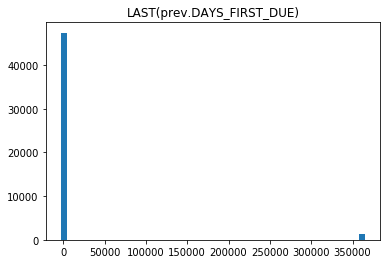

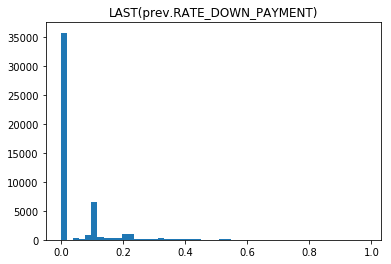

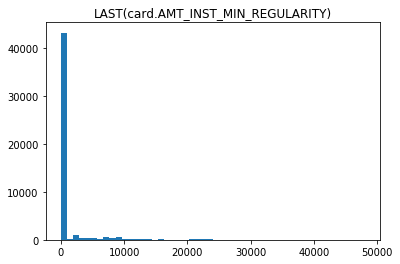

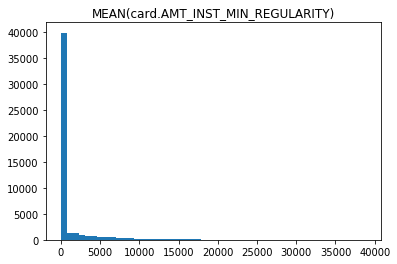

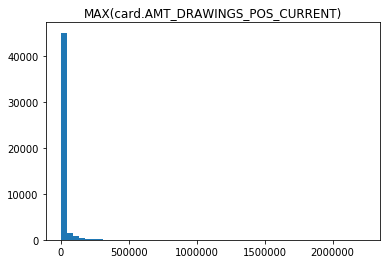

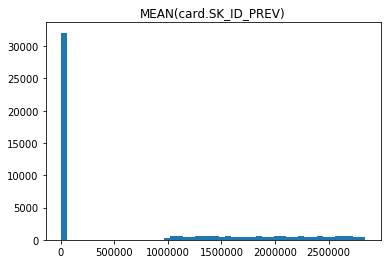

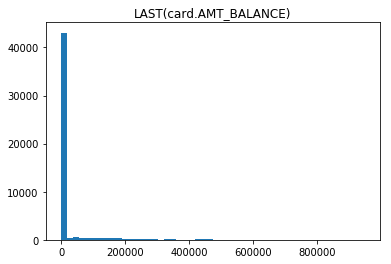

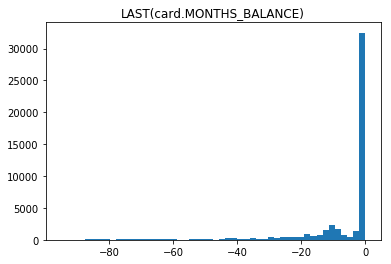

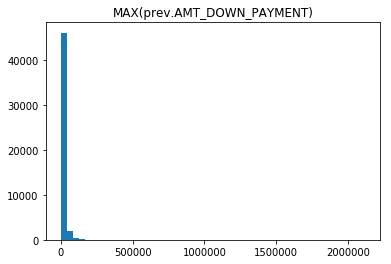

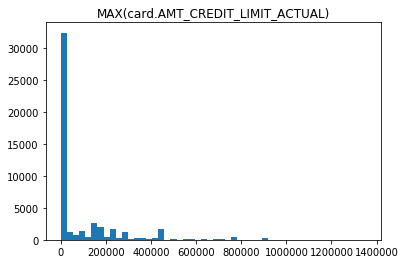

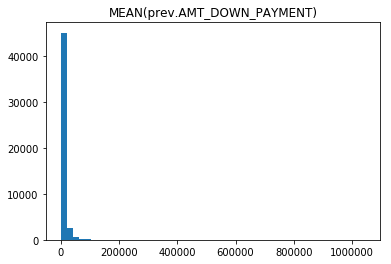

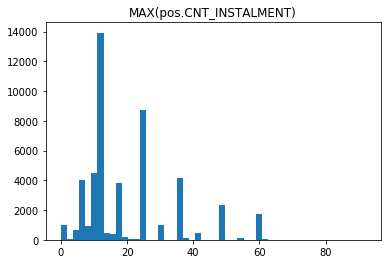

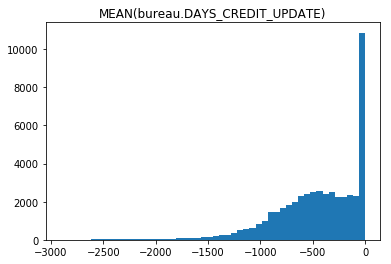

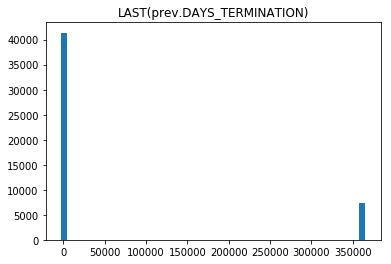

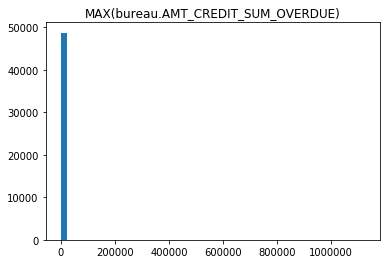

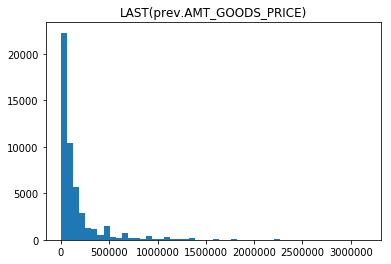

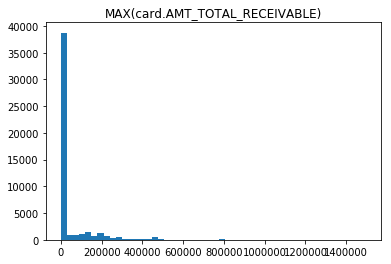

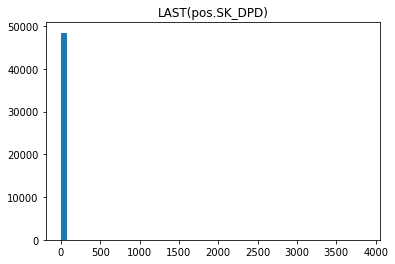

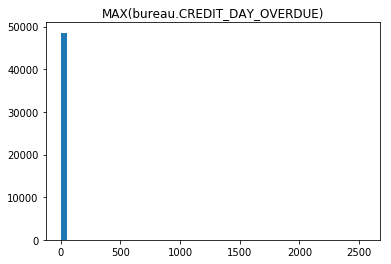

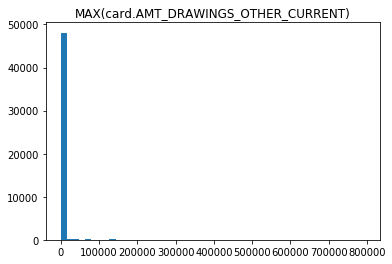

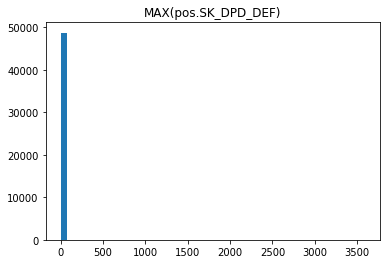

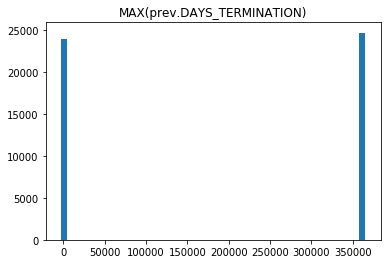

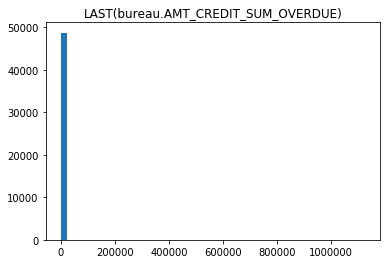

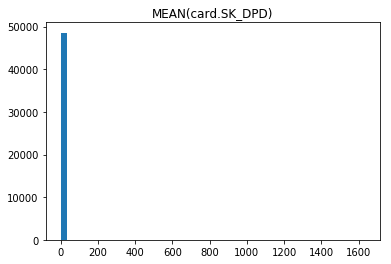

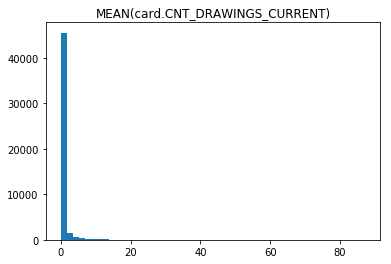

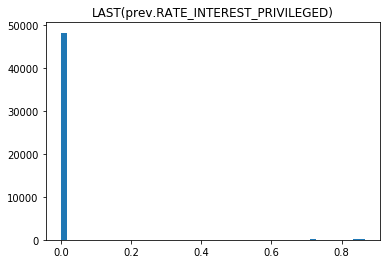

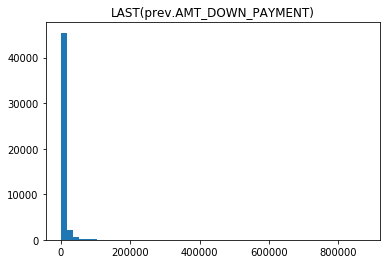

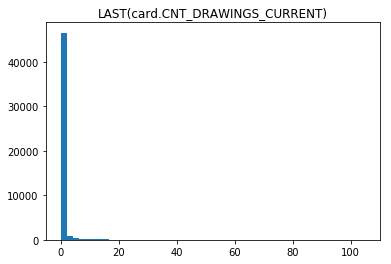

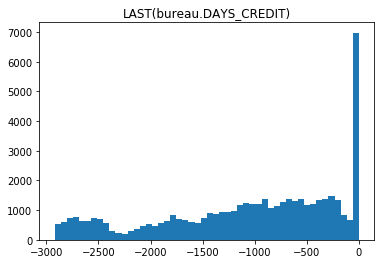

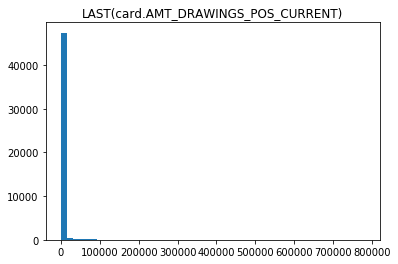

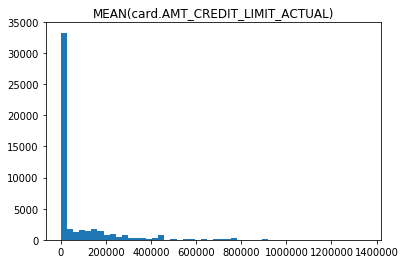

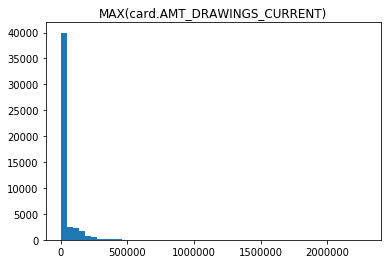

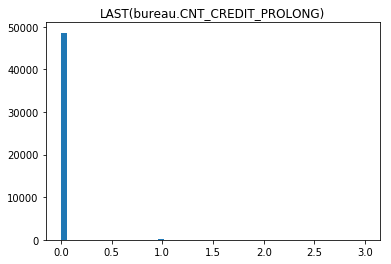

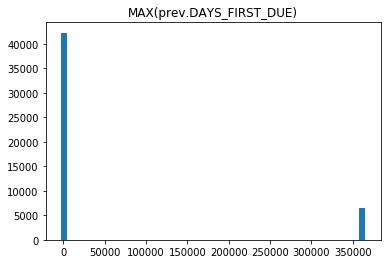

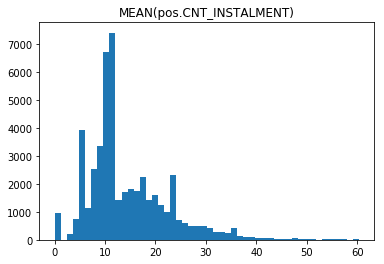

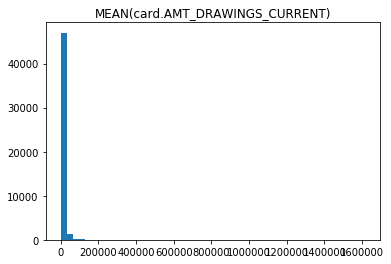

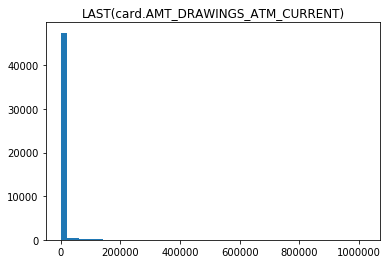

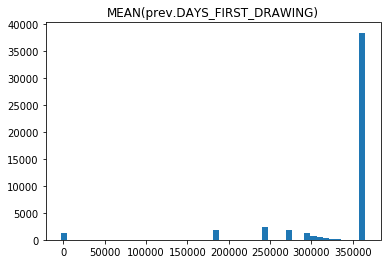

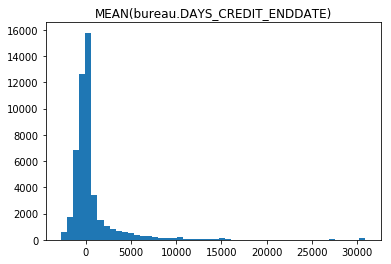

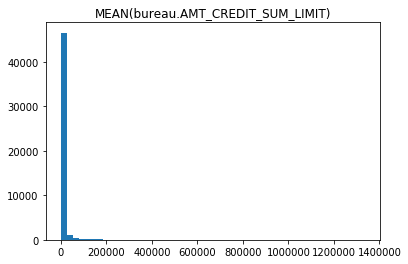

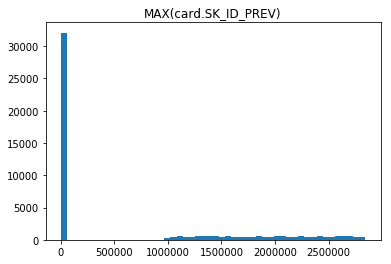

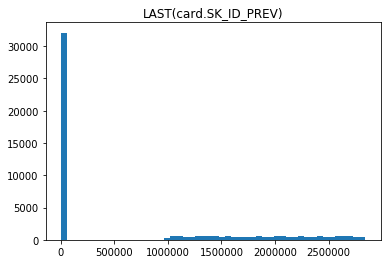

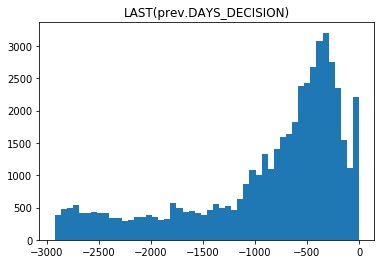

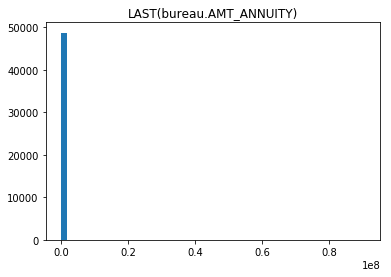

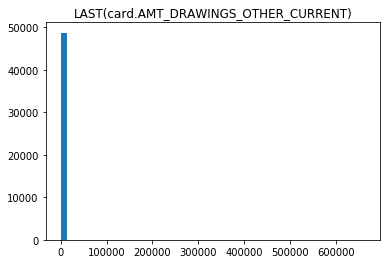

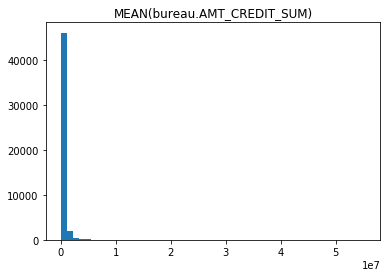

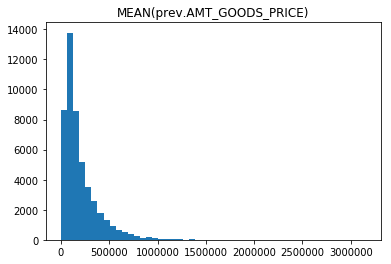

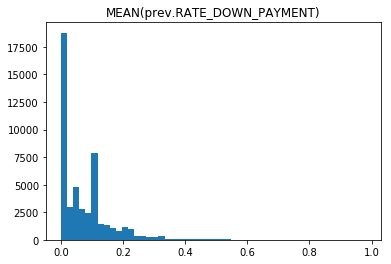

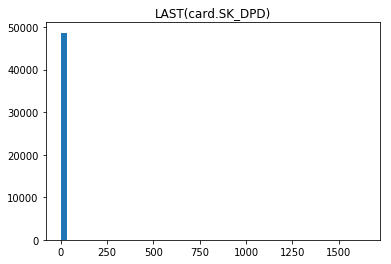

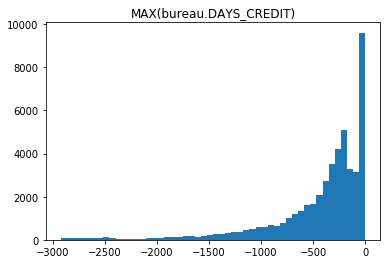

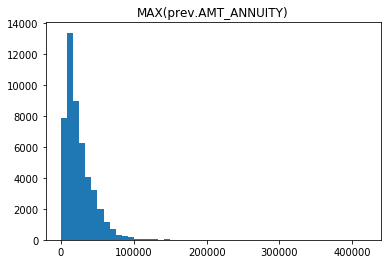

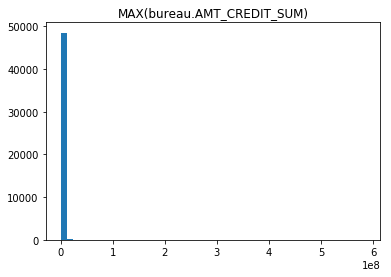

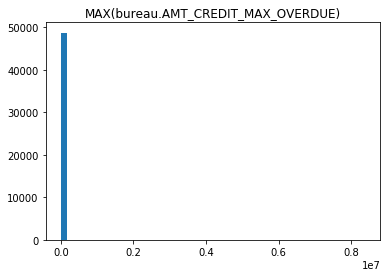

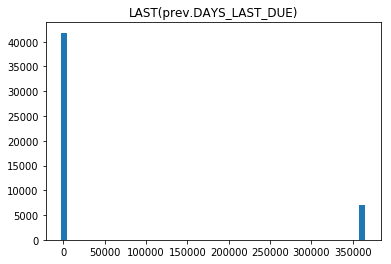

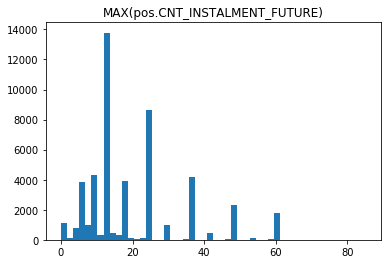

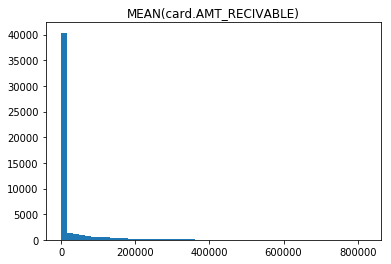

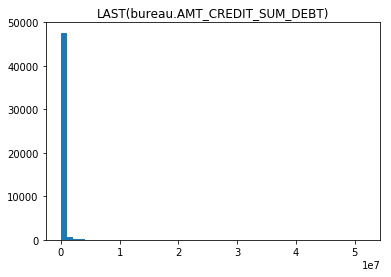

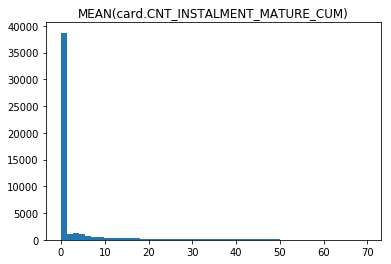

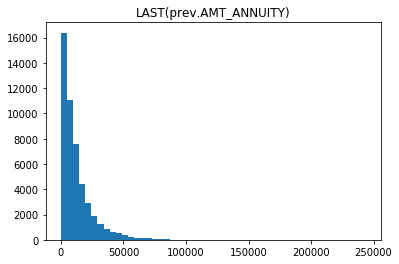

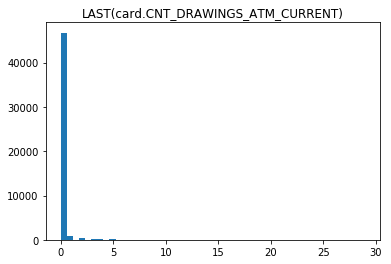

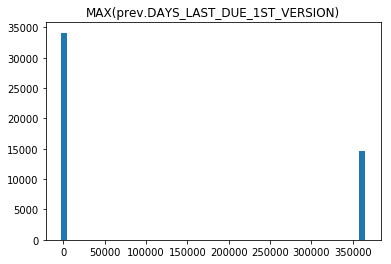

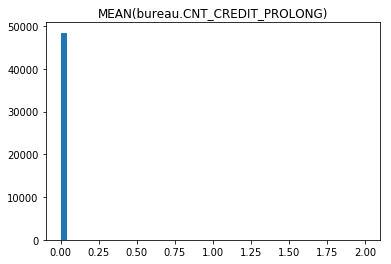

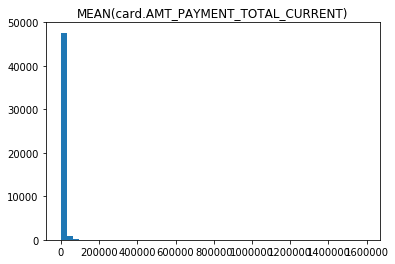

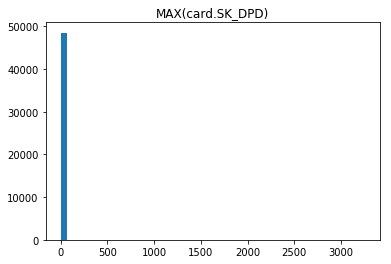

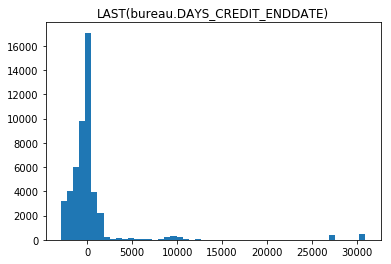

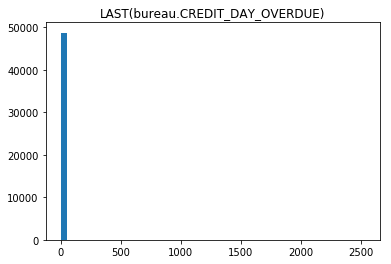

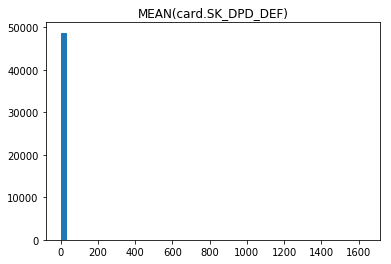

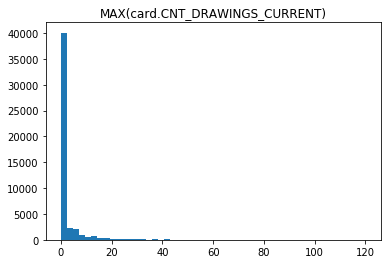

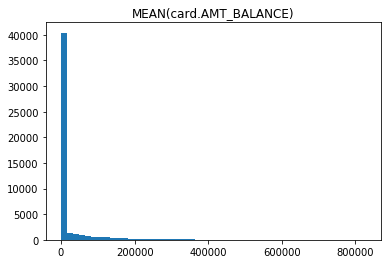

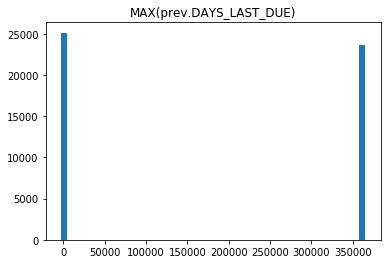

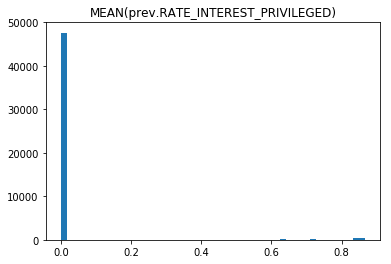

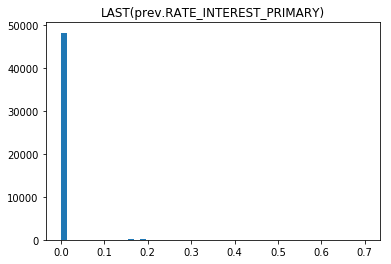

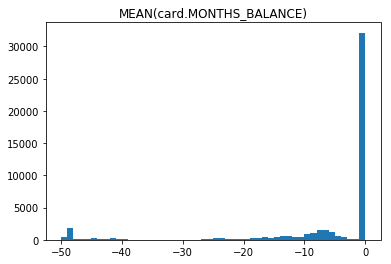

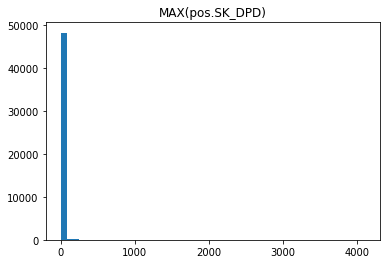

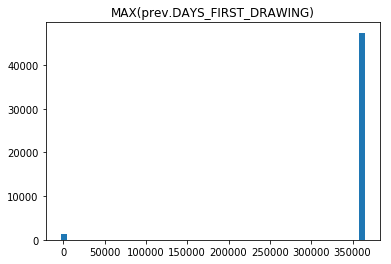

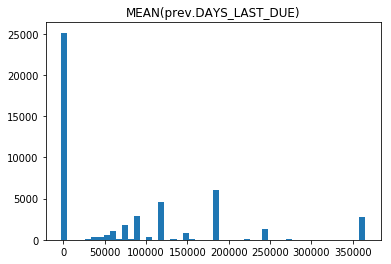

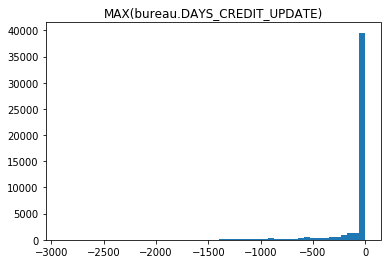

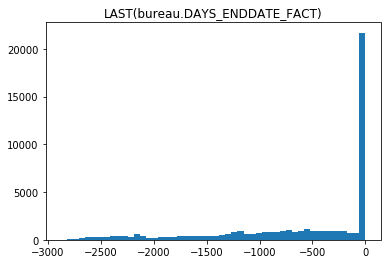

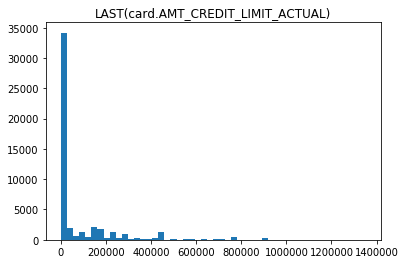

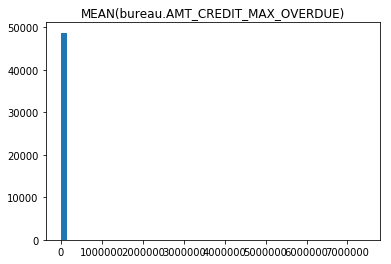

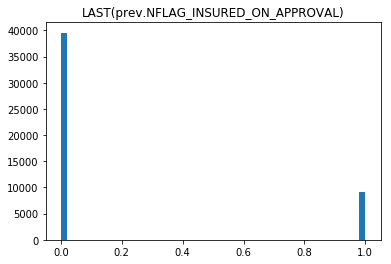

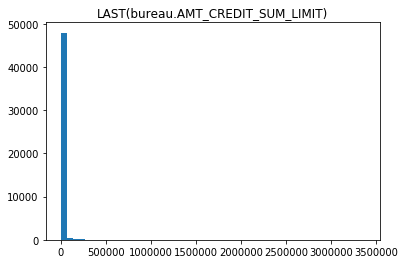

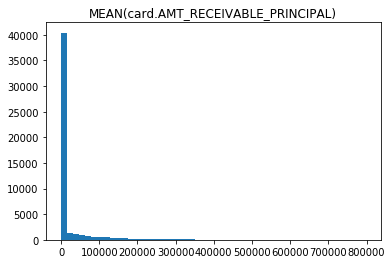

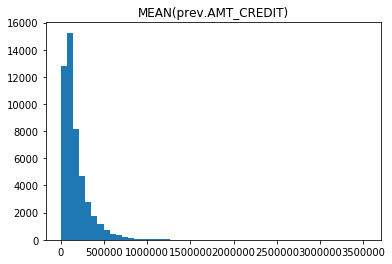

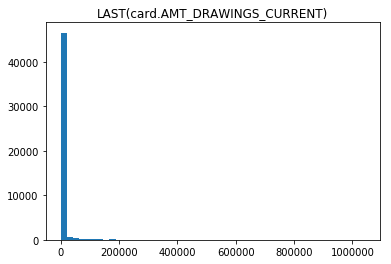

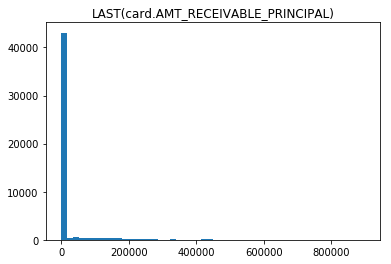

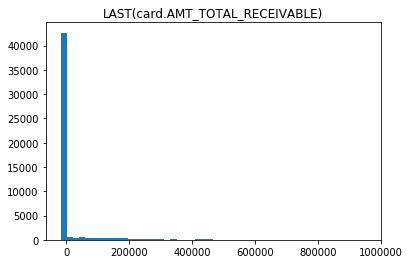

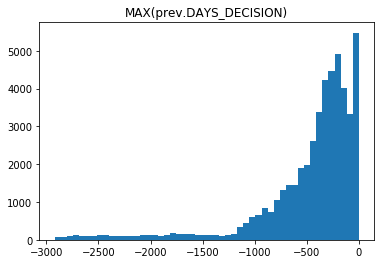

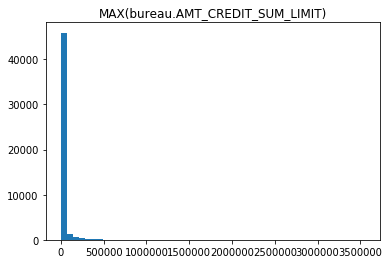

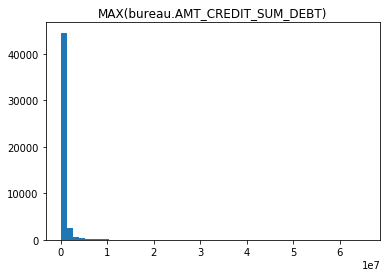

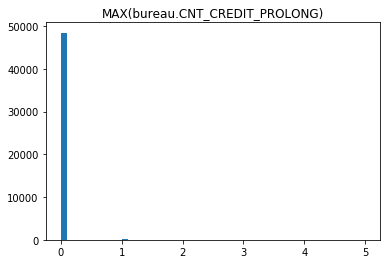

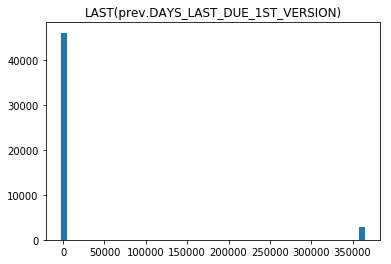

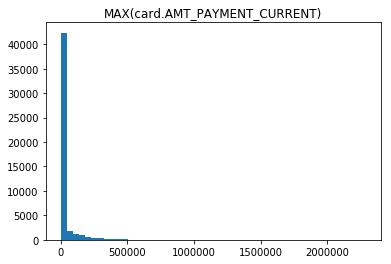

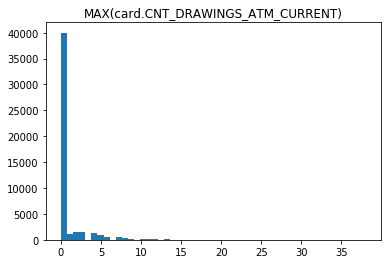

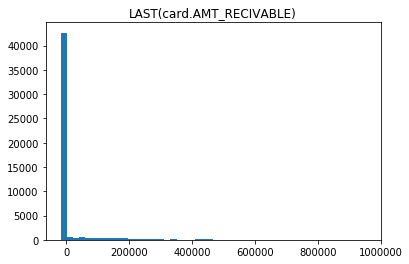

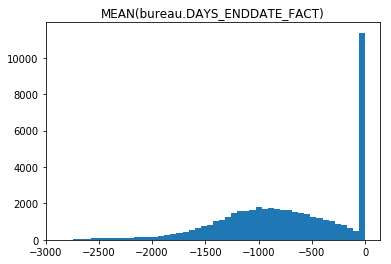

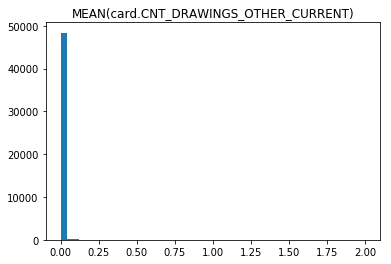

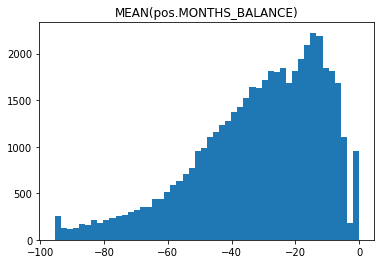

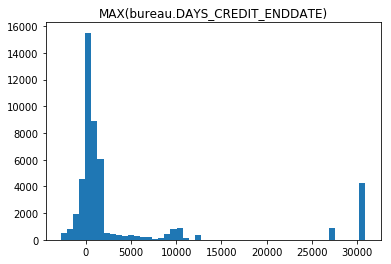

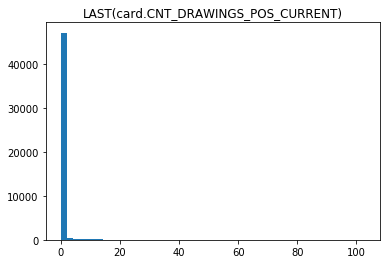

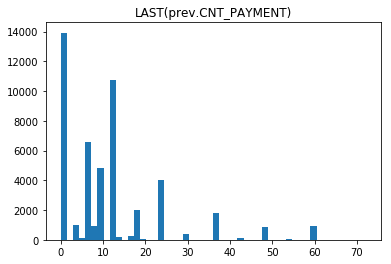

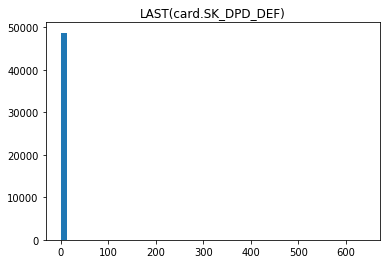

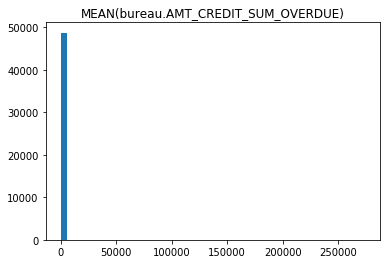

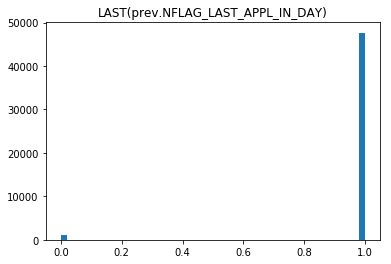

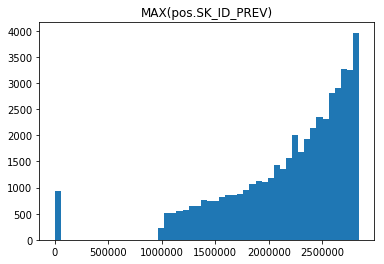

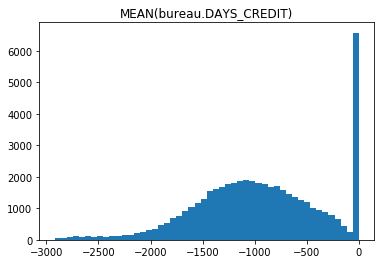

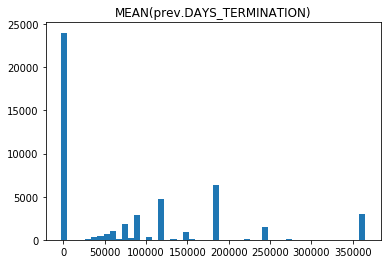

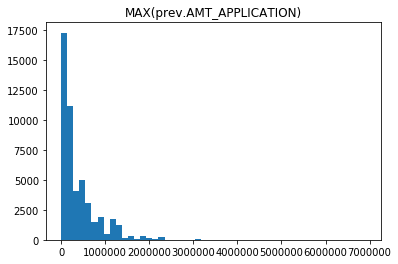

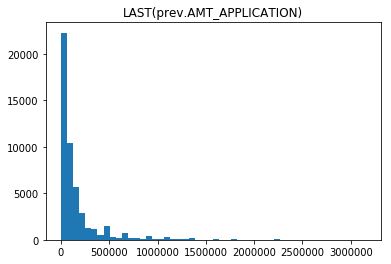

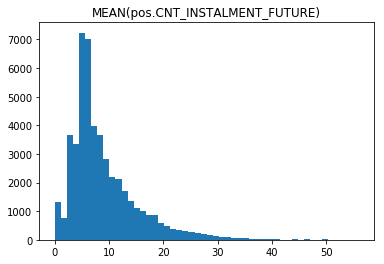

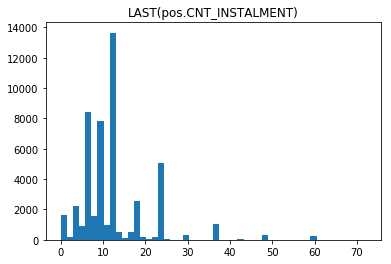

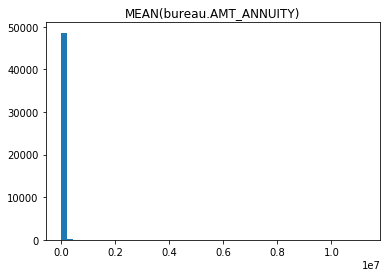

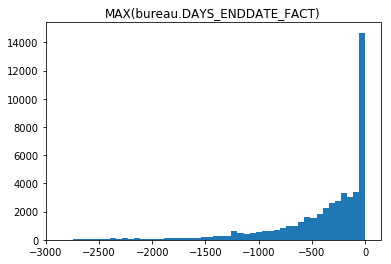

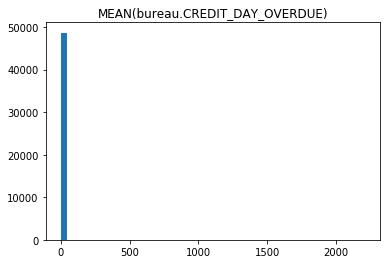

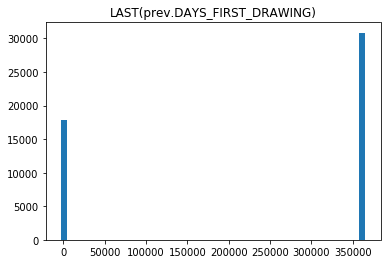

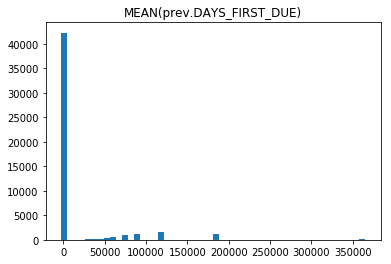

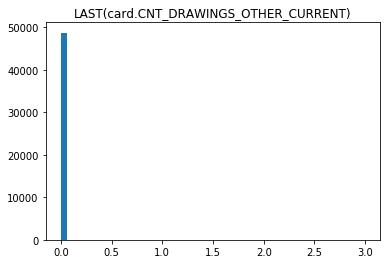

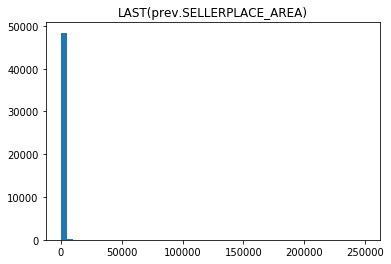

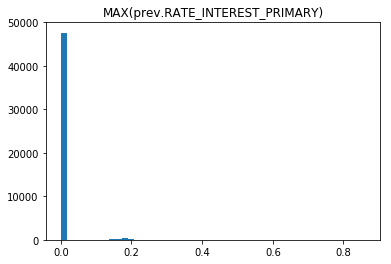

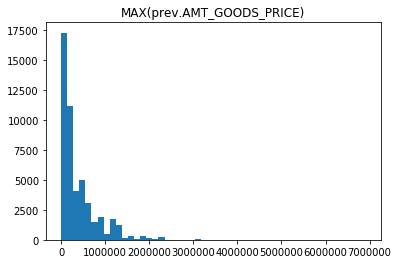

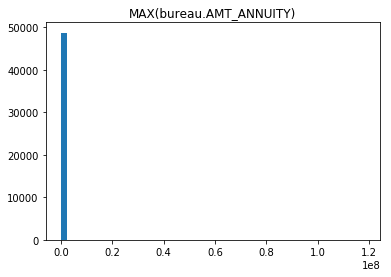

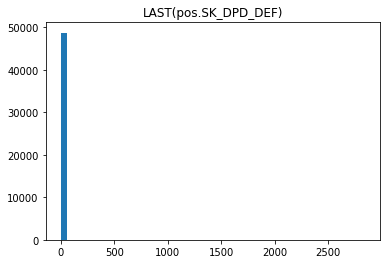

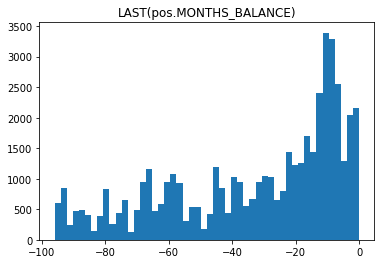

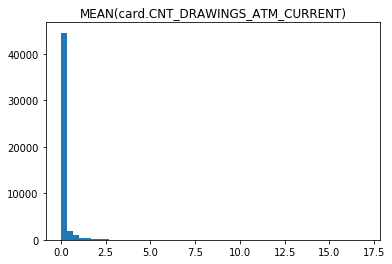

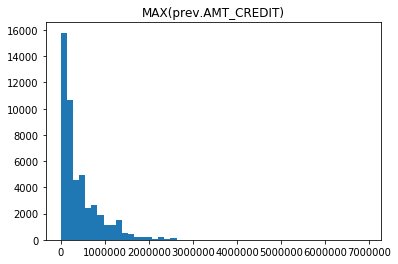

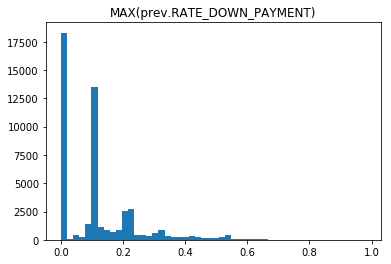

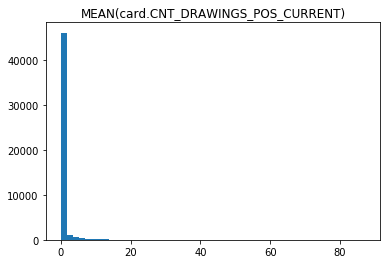

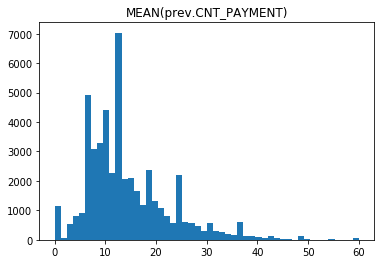

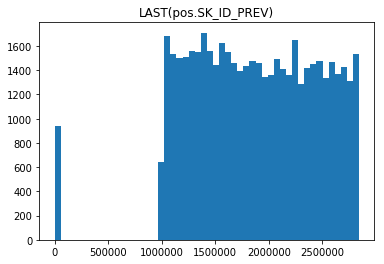

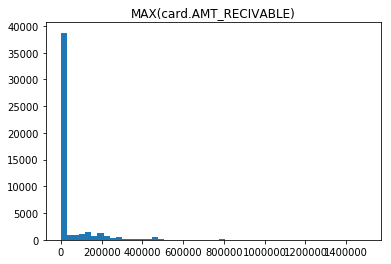

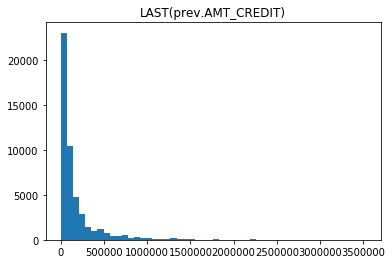

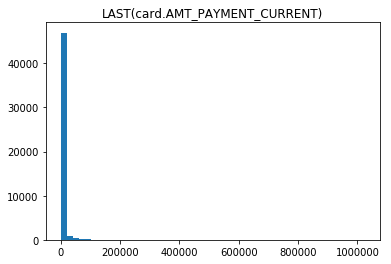

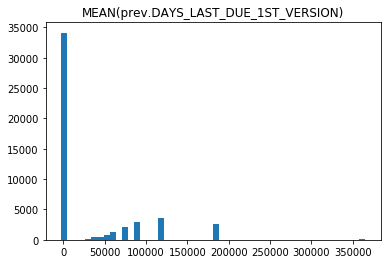

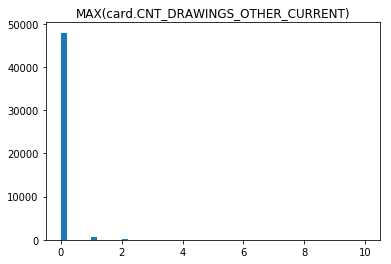

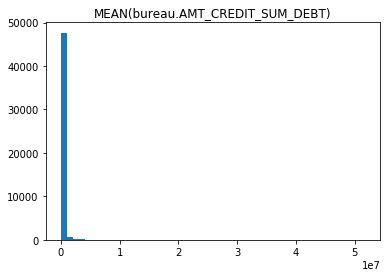

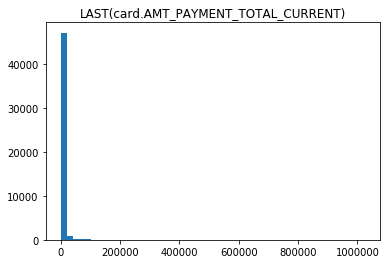

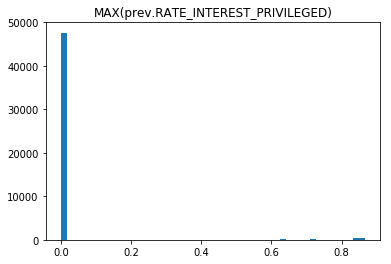

In [118]:
for fn in features_numeric.columns:
    
    plt.hist( features_numeric[fn].values , bins = 50   )
    plt.title( fn )
    plt.show()

9000.000      254062
2250.000      179120
4500.000      174143
6750.000      173659
3375.000      149941
5625.000       96362
7875.000       60248
1125.000       60224
13500.000      42926
8100.000       37295
10800.000      30054
4050.000       29264
225.000        28688
450.000        26207
67.500         25229
900.000        23504
5400.000       18647
11250.000      18238
1350.000       16668
22500.000      14701
130.500        10017
10492.020       9938
2700.000        8762
9450.000        8450
15750.000       8202
10332.180       7911
5246.010        7676
7869.015        7668
27449.820       7328
21709.125       6995
               ...  
184039.560         1
20139.120          1
59635.485          1
20128.005          1
59408.235          1
59862.015          1
16438.545          1
16462.170          1
20157.255          1
20162.745          1
59439.735          1
20155.005          1
20166.120          1
16435.170          1
184309.560         1
20167.245          1
16843.455    

In [ ]:
lgb_train = lgb.Dataset( x_train , y_train )
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)

#lgb_train = lgb.Dataset( x_train , y_train)
#lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)
y_train.shape
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'mse'},
    'num_leaves': 20,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 1 , 
    'num_threads' : 4 ,
}